# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_fae/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1771421544_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/544386226_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1642679791_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/855700733_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1890266440_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/980364771_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results/re

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1771421544_attl0_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, active)]
1:[(ActionResult, failure), (ConnObs, inactive)]
2:[(ActionResult, success), (ConnObs, active)]
3:[(ActionResult, success), (ConnObs, inactive)]


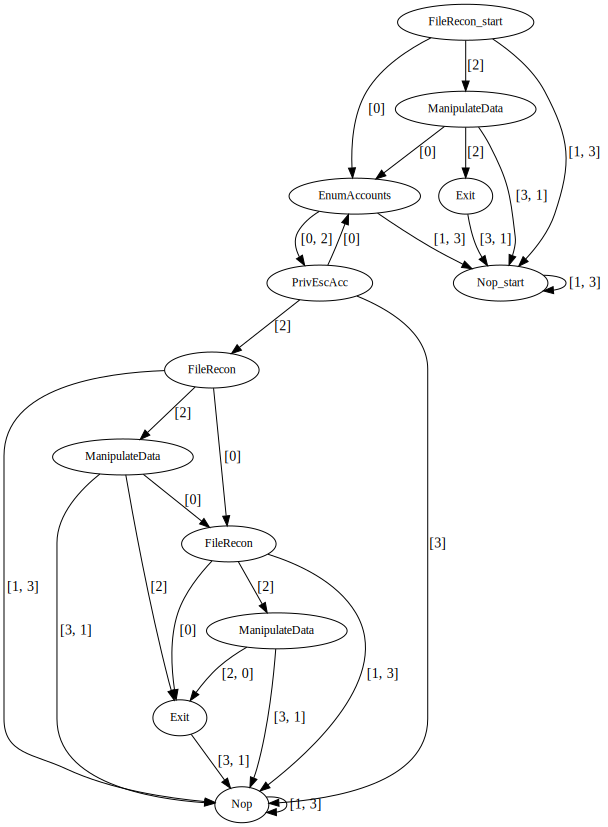

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/544386226_attl0_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, inactive)]
1:[(ActionResult, success), (ConnObs, inactive)]
2:[(ActionResult, failure), (ConnObs, active)]
3:[(ActionResult, success), (ConnObs, active)]


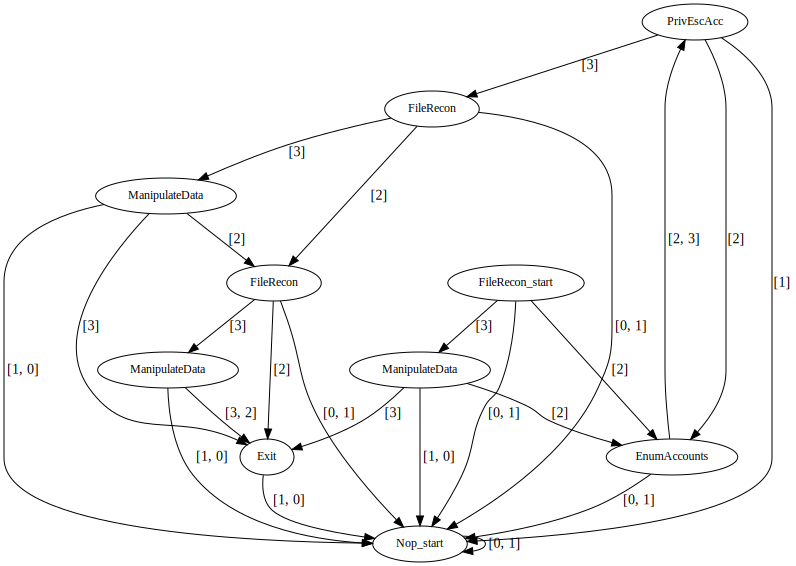

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1642679791_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


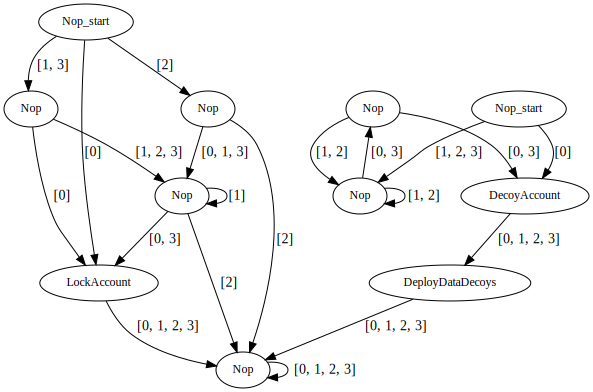

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/855700733_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


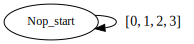

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1890266440_attl2_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, active)]
1:[(ActionResult, failure), (ConnObs, inactive)]
2:[(ActionResult, success), (ConnObs, active)]
3:[(ActionResult, success), (ConnObs, inactive)]


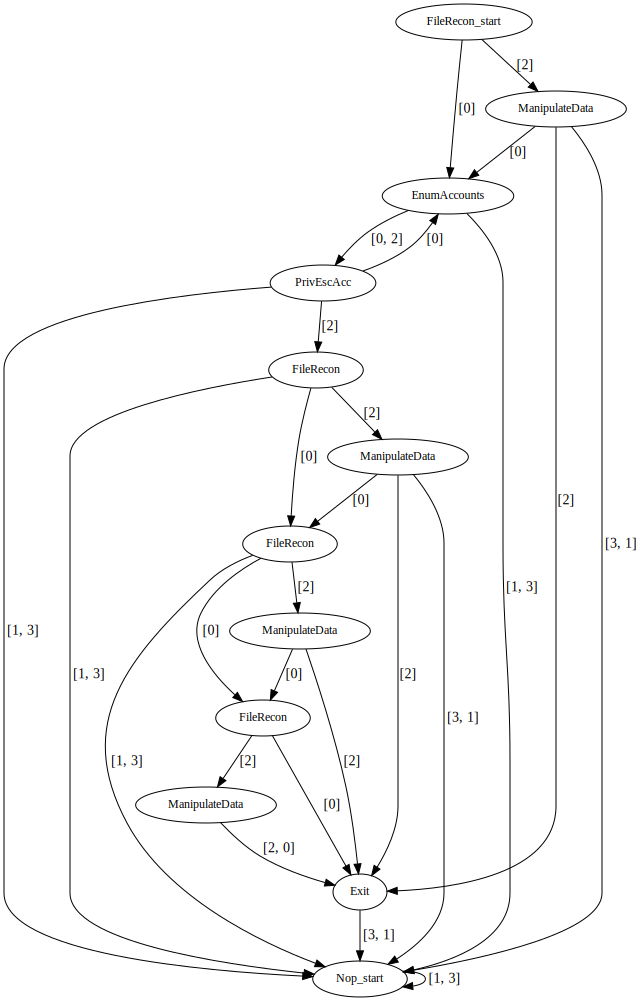

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/980364771_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


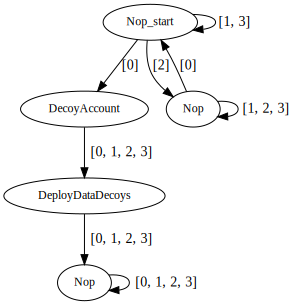

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                         su_login
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                       file_write

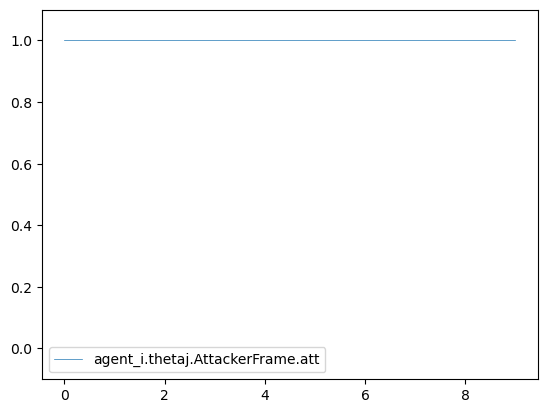

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.339890                        0.660110   
4                         0.333488                        0.666513   
5                         0.516302                        0.483697   
6                         0.565636                        0.434364   
7                         0.565636                        0.434364   
8                         0.565636                        0.434364   
9                         0.565636                        0.434364   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

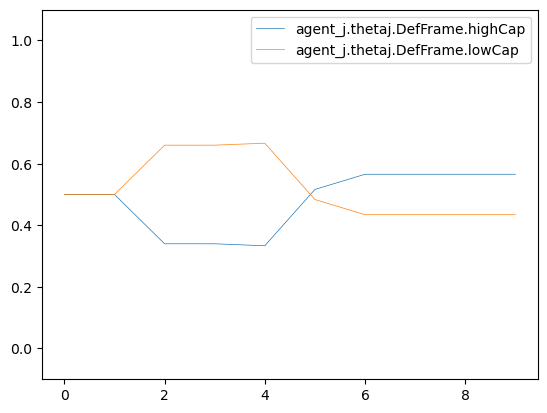

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount  ManipulateData
2                 0.0                  1.0  DeployDataDecoys    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

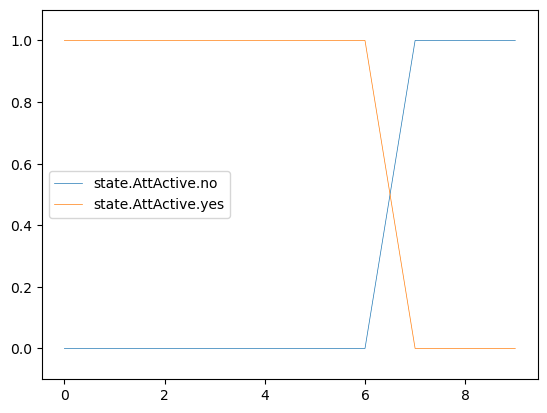

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01      DecoyAccount   
2          1.908033e-02           9.809197e-01  DeployDataDecoys   
3          2.294031e-04           9.997706e-01               Nop   
4          2.367759e-06           9.999976e-01               Nop   
5          2.441012e-08           1.000000e+00               Nop   
6          2.716937e-08           1.000000e+00               Nop   
7          9.995815e-01           4.186070e-04               Nop   
8          9.986165e-01           1.383489e-03               Nop   
9          9.999995e-01           5.093530e-07               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                       file_write

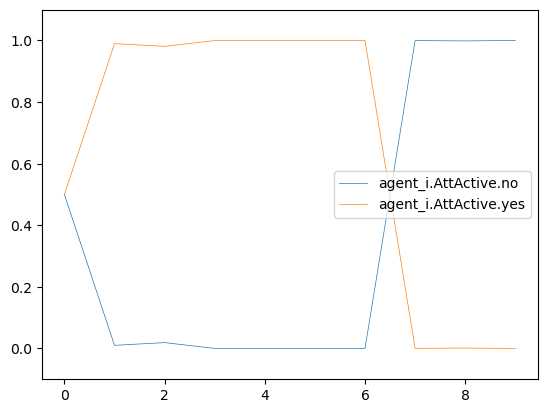

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           success   
1      DecoyAccount                           failure   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

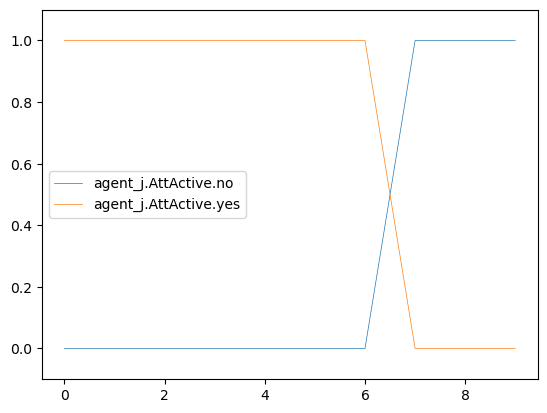

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount  ManipulateData  
2                      1.0  DeployDataDecoys    EnumAccounts  
3                      1.0               Nop      PrivEscAcc  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

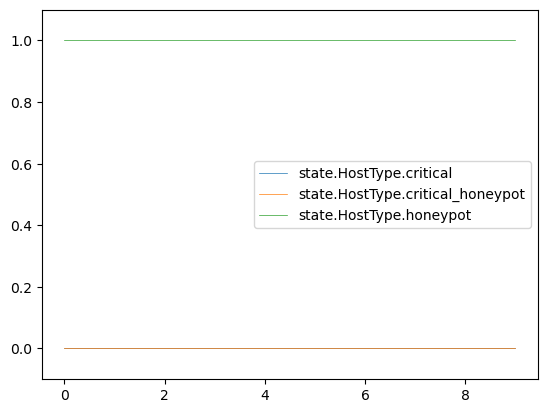

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount  ManipulateData   
2                        1.0  DeployDataDecoys    EnumAccounts   
3                        1.0               Nop      PrivEscAcc   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                         su_login  
4                        file_enum  
5                       file_write  
6                             none  
7                       file_write  
8                             none  
9                       file_write

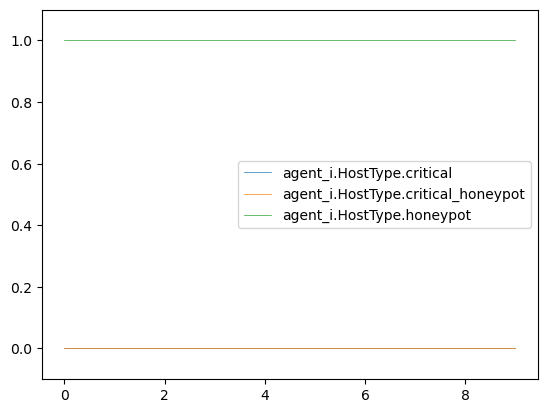

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0  ManipulateData      DecoyAccount   
2                        0.0    EnumAccounts  DeployDataDecoys   
3                        0.0      PrivEscAcc               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

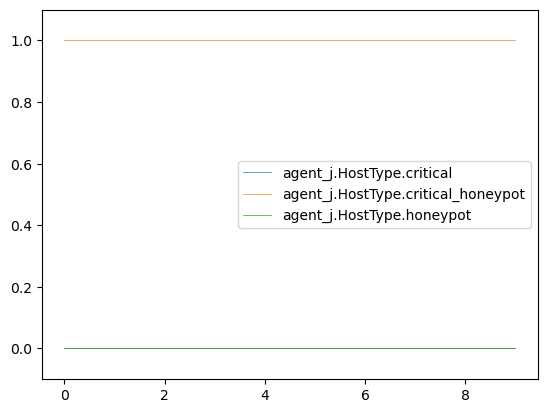

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     0.0                     1.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

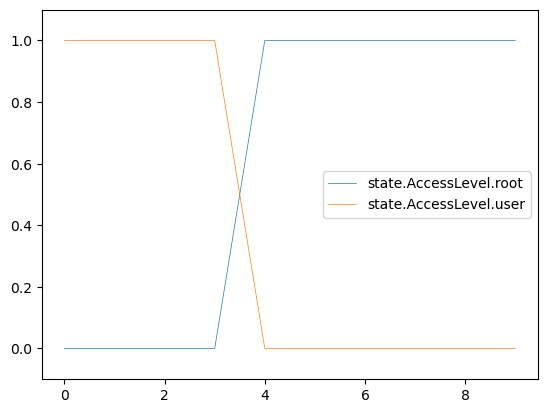

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.000947              9.990532e-01               Nop   
4                  0.989998              1.000234e-02               Nop   
5                  0.990000              9.999999e-03               Nop   
6                  0.999997              2.896301e-06               Nop   
7                  1.000000              4.669829e-08               Nop   
8                  1.000000              2.010699e-08               Nop   
9                  1.000000              1.140899e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                       file_write

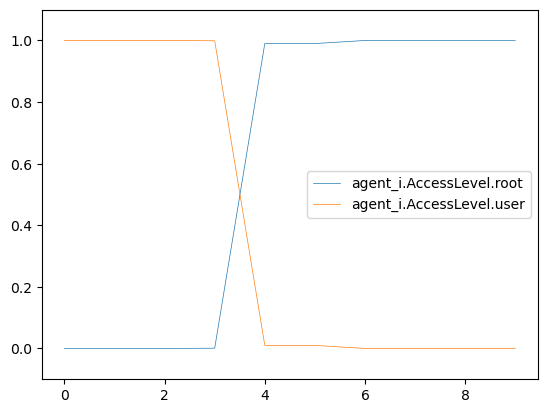

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00  ManipulateData   
2                  0.000000              9.999999e-01    EnumAccounts   
3                  0.000000              1.000000e+00      PrivEscAcc   
4                  0.999999              1.123457e-06       FileRecon   
5                  0.999999              4.926387e-07  ManipulateData   
6                  1.000000              3.224705e-07            Exit   
7                  1.000000              3.224705e-07             Nop   
8                  1.000000              3.224705e-07             Nop   
9                  1.000000              3.224705e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           success   
1      DecoyAccount                           failure   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

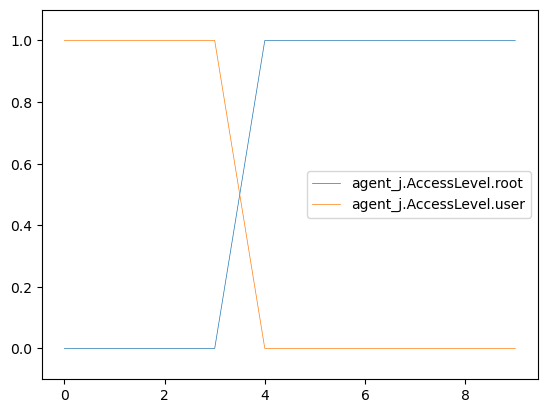

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount  ManipulateData
2                 1.0                  0.0  DeployDataDecoys    EnumAccounts
3                 1.0                  0.0               Nop      PrivEscAcc
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

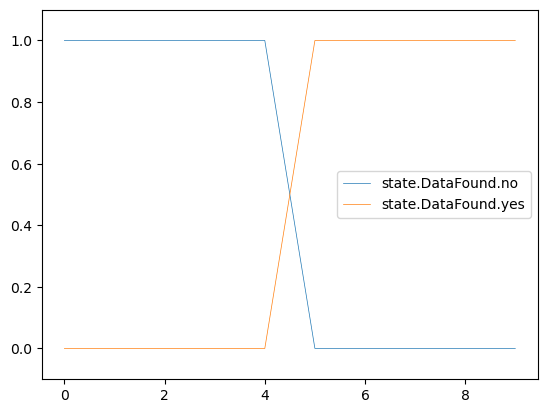

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.999992               0.000008               Nop   
5              0.208792               0.791208               Nop   
6              0.027580               0.972420               Nop   
7              0.000101               0.999899               Nop   
8              0.000065               0.999935               Nop   
9              0.000030               0.999970               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                       file_write

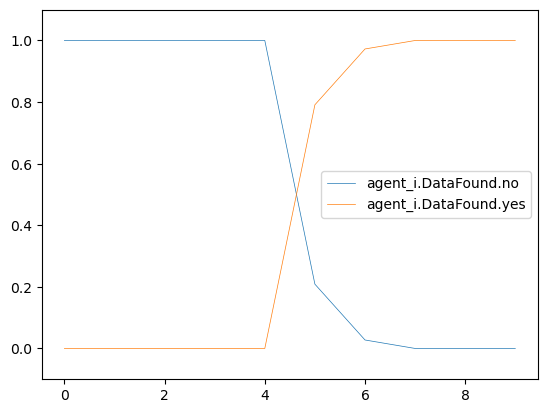

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.307692               0.692308  ManipulateData   
2              0.997753               0.002247    EnumAccounts   
3              0.997753               0.002247      PrivEscAcc   
4              0.997753               0.002247       FileRecon   
5              0.114217               0.885783  ManipulateData   
6              0.000129               0.999871            Exit   
7              0.000129               0.999871             Nop   
8              0.000129               0.999871             Nop   
9              0.000129               0.999871             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           success   
1      DecoyAccount                           failure   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

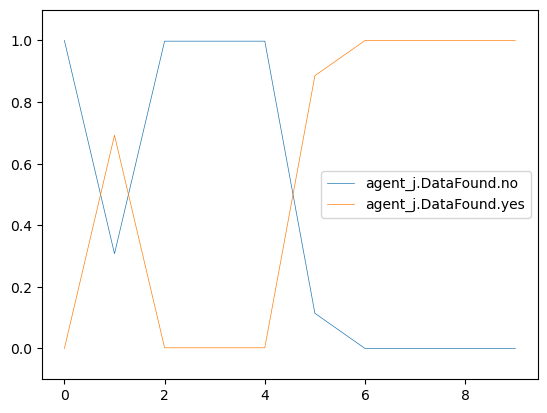

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

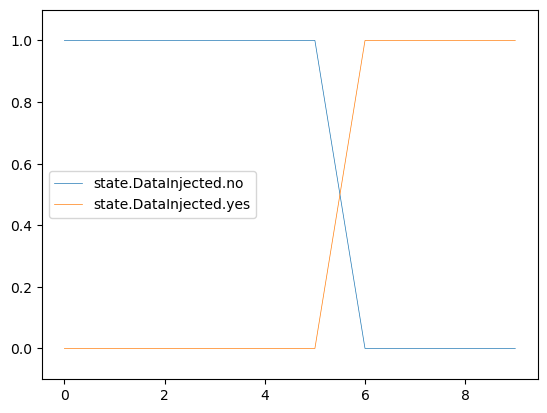

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000              0.000000e+00               Nop   
1                 1.000000              0.000000e+00      DecoyAccount   
2                 1.000000              0.000000e+00  DeployDataDecoys   
3                 1.000000              0.000000e+00               Nop   
4                 1.000000              0.000000e+00               Nop   
5                 1.000000              7.246396e-08               Nop   
6                 0.030689              9.693106e-01               Nop   
7                 0.000397              9.996035e-01               Nop   
8                 0.000070              9.999303e-01               Nop   
9                 0.000032              9.999682e-01               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                       file_write

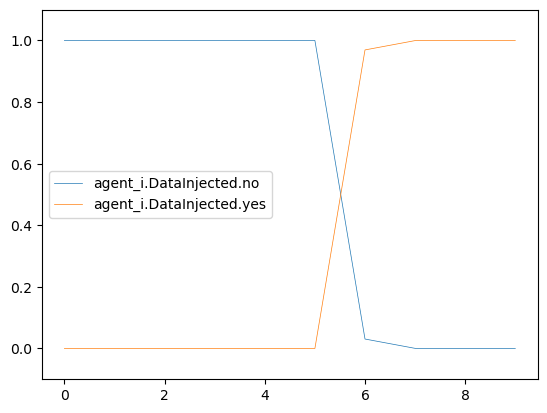

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.997753                  0.002247    EnumAccounts   
3                 0.997753                  0.002247      PrivEscAcc   
4                 0.997753                  0.002247       FileRecon   
5                 0.995699                  0.004301  ManipulateData   
6                 0.000129                  0.999871            Exit   
7                 0.000129                  0.999871             Nop   
8                 0.000129                  0.999871             Nop   
9                 0.000129                  0.999871             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           success   
1      DecoyAccount                           failure   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

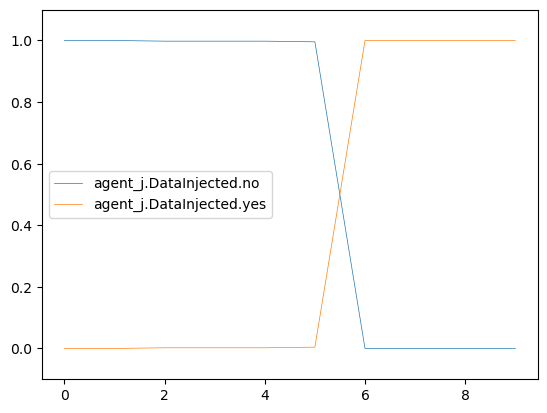

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

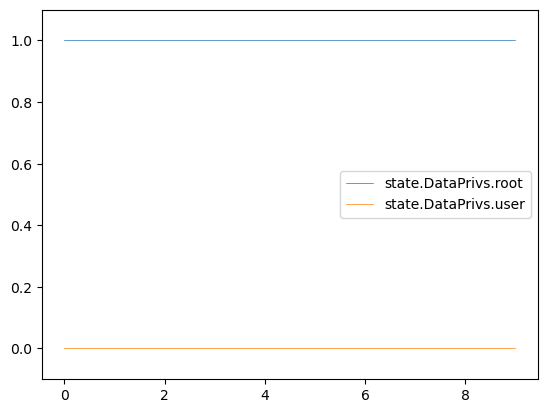

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                       file_write

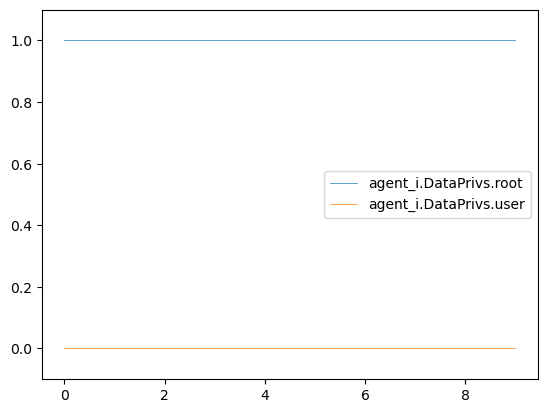

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.192308                0.807692  ManipulateData   
2                0.623595                0.376404    EnumAccounts   
3                0.623596                0.376404      PrivEscAcc   
4                0.623596                0.376405       FileRecon   
5                0.694097                0.305903  ManipulateData   
6                0.713116                0.286884            Exit   
7                0.713116                0.286884             Nop   
8                0.713116                0.286884             Nop   
9                0.713116                0.286884             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           success   
1      DecoyAccount                           failure   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

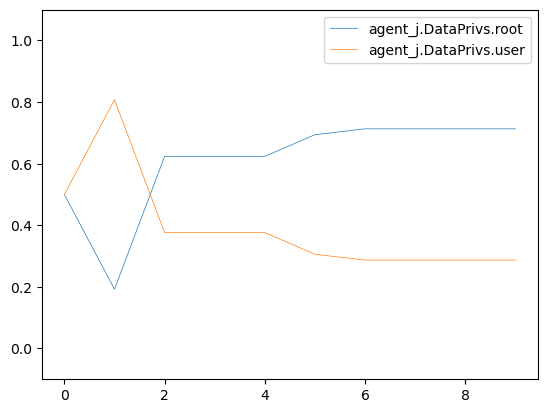

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount  ManipulateData
2                1.0                 0.0  DeployDataDecoys    EnumAccounts
3                0.0                 1.0               Nop      PrivEscAcc
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

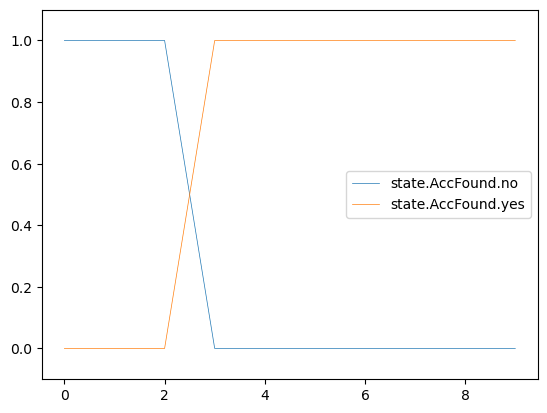

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         9.175472e-01              0.082453  DeployDataDecoys   
3         1.022711e-02              0.989773               Nop   
4         1.000224e-02              0.989998               Nop   
5         1.099242e-04              0.999890               Nop   
6         2.896301e-06              0.999997               Nop   
7         2.834956e-08              1.000000               Nop   
8         2.010699e-08              1.000000               Nop   
9         1.140887e-08              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                       file_write

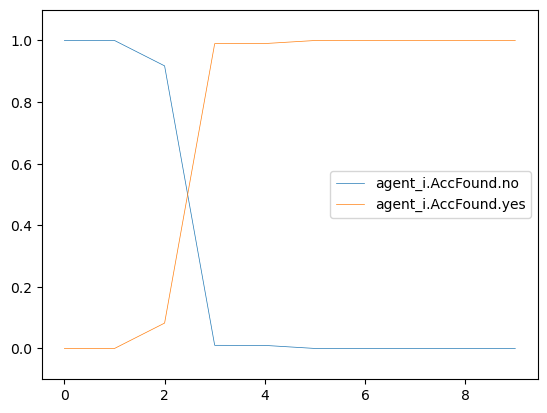

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000  ManipulateData   
2         9.999999e-01              0.000000    EnumAccounts   
3         1.121076e-03              0.998879      PrivEscAcc   
4         1.123457e-06              0.999999       FileRecon   
5         4.926387e-07              0.999999  ManipulateData   
6         3.224705e-07              1.000000            Exit   
7         3.224705e-07              1.000000             Nop   
8         3.224705e-07              1.000000             Nop   
9         3.224705e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           success   
1      DecoyAccount                           failure   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

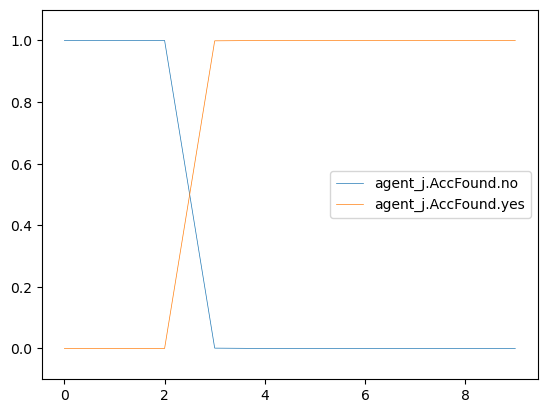

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

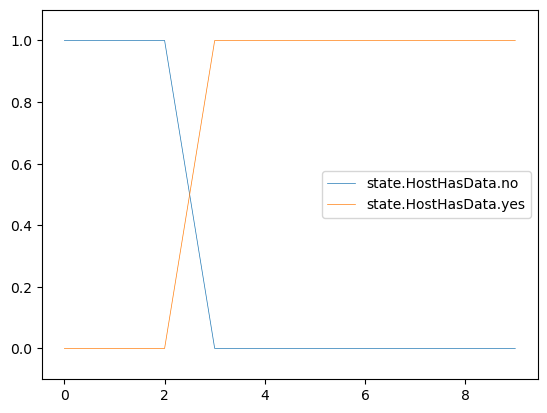

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                       file_write

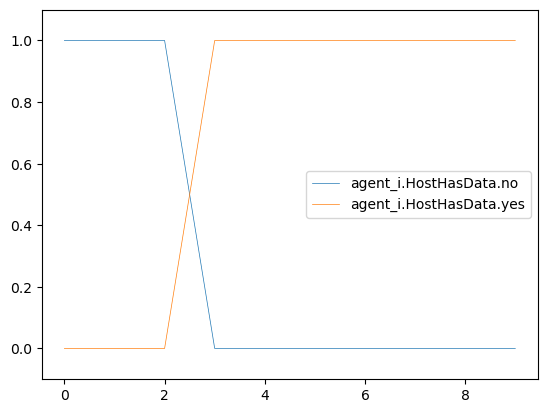

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.192308                 0.807692  ManipulateData   
2                0.623595                 0.376404    EnumAccounts   
3                0.423949                 0.576051      PrivEscAcc   
4                0.422013                 0.577987       FileRecon   
5                0.089706                 0.910294  ManipulateData   
6                0.000100                 0.999900            Exit   
7                0.000100                 0.999900             Nop   
8                0.000100                 0.999900             Nop   
9                0.000100                 0.999900             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           success   
1      DecoyAccount                           failure   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

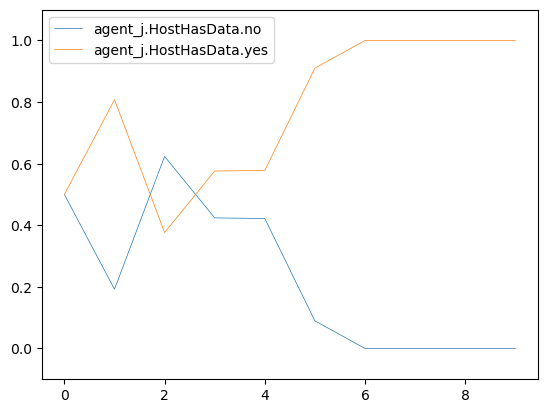

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

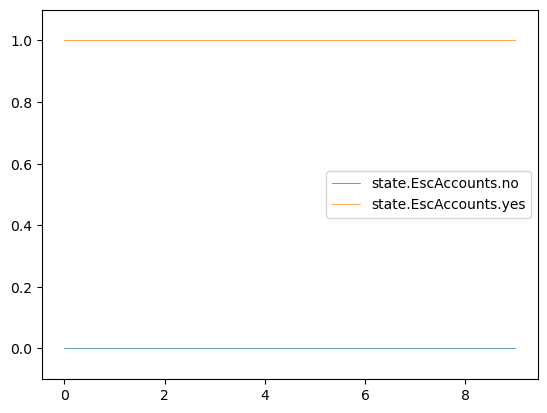

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                       file_write

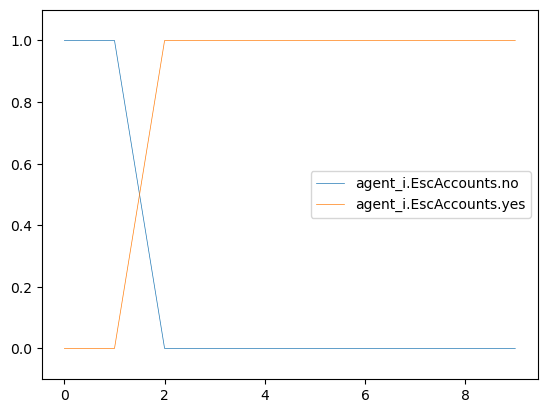

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0  ManipulateData   
2                     0.0                      1.0    EnumAccounts   
3                     0.0                      1.0      PrivEscAcc   
4                     0.0                      1.0       FileRecon   
5                     0.0                      1.0  ManipulateData   
6                     0.0                      1.0            Exit   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           success   
1      DecoyAccount                           failure   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

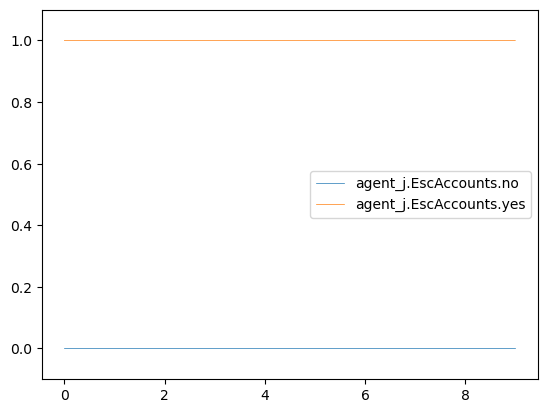

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

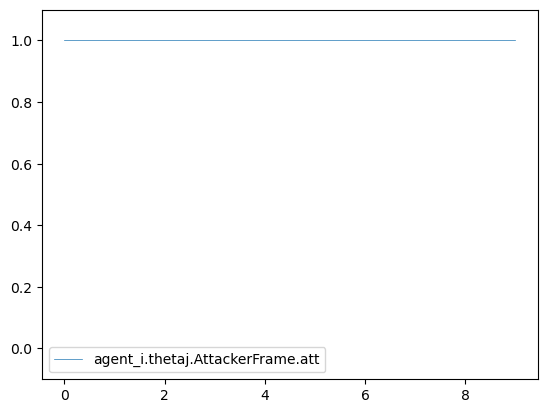

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.507792                        0.492208   
5                         0.136620                        0.863380   
6                         0.406439                        0.593561   
7                         0.586448                        0.413552   
8                         0.586448                        0.413552   
9                         0.586448                        0.413552   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

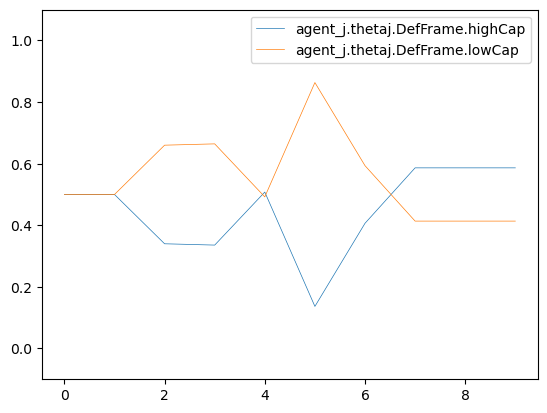

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop       FileRecon
6                 0.0                  1.0               Nop  ManipulateData
7                 0.0                  1.0               Nop            Exit
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

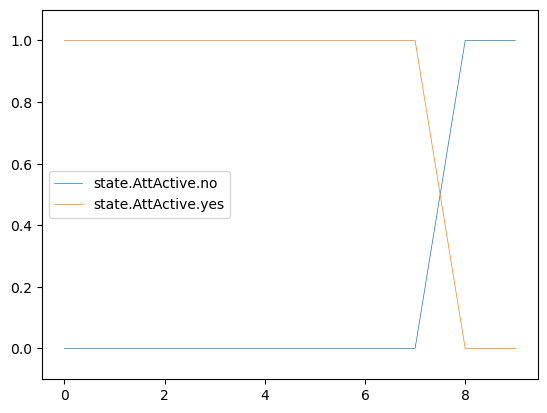

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01               0.500000               Nop   
1          1.020408e-02               0.989796      DecoyAccount   
2          1.179412e-04               0.999882  DeployDataDecoys   
3          1.229218e-06               0.999999               Nop   
4          1.267251e-08               1.000000               Nop   
5          3.556729e-09               1.000000               Nop   
6          2.573226e-01               0.742677               Nop   
7          8.849865e-02               0.911501               Nop   
8          9.996558e-01               0.000344               Nop   
9          9.999970e-01               0.000003               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

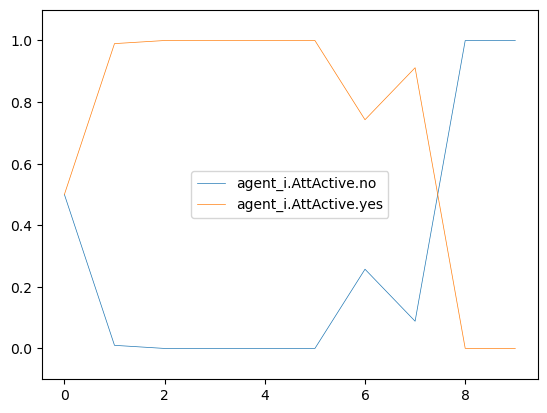

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0       FileRecon   
6                   0.0                    1.0  ManipulateData   
7                   0.0                    1.0            Exit   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

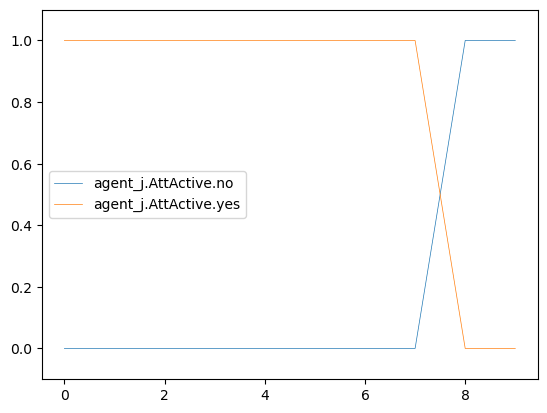

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop       FileRecon  
6                      1.0               Nop  ManipulateData  
7                      1.0               Nop            Exit  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

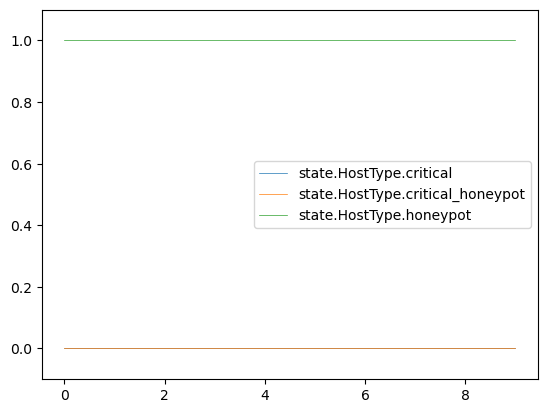

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop       FileRecon   
6                        1.0               Nop  ManipulateData   
7                        1.0               Nop            Exit   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                             none

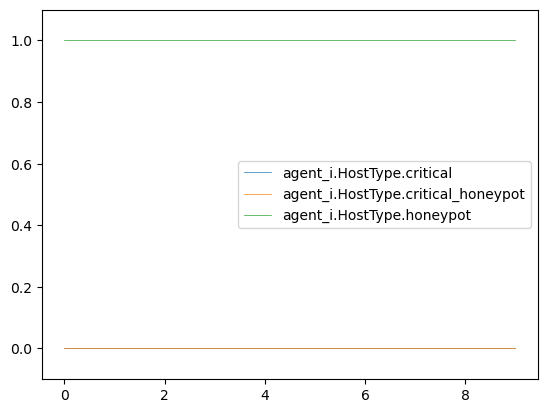

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0    EnumAccounts      DecoyAccount   
2                        0.0      PrivEscAcc  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0       FileRecon               Nop   
6                        0.0  ManipulateData               Nop   
7                        0.0            Exit               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

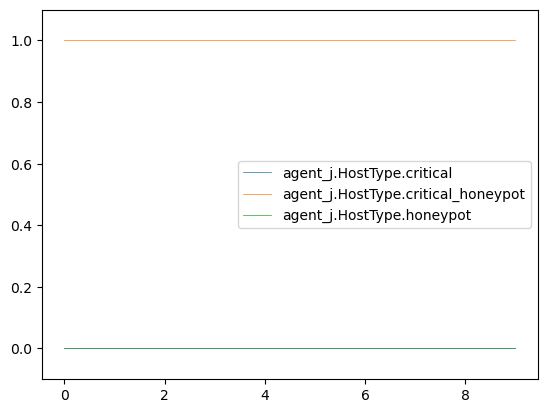

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

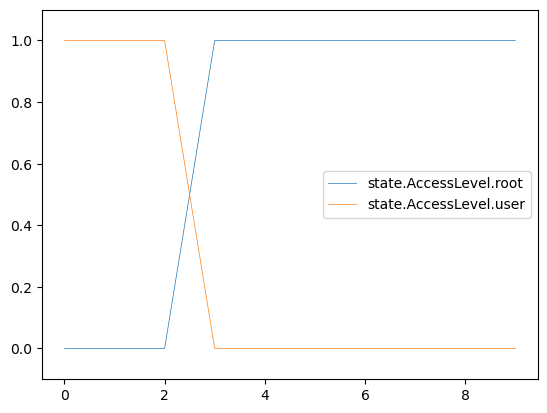

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989987                  0.010013               Nop   
4                  0.990000                  0.010000               Nop   
5                  0.999997                  0.000003               Nop   
6                  0.999926                  0.000074               Nop   
7                  0.999992                  0.000008               Nop   
8                  0.999998                  0.000002               Nop   
9                  0.999998                  0.000002               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

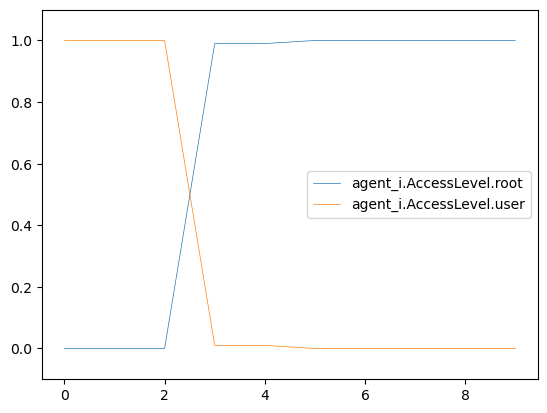

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              9.999999e-01      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  1.000000              5.219558e-07  ManipulateData   
5                  0.999998              1.802073e-06       FileRecon   
6                  0.999999              9.207281e-07  ManipulateData   
7                  1.000000              3.327400e-07            Exit   
8                  1.000000              3.327400e-07             Nop   
9                  1.000000              3.327400e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

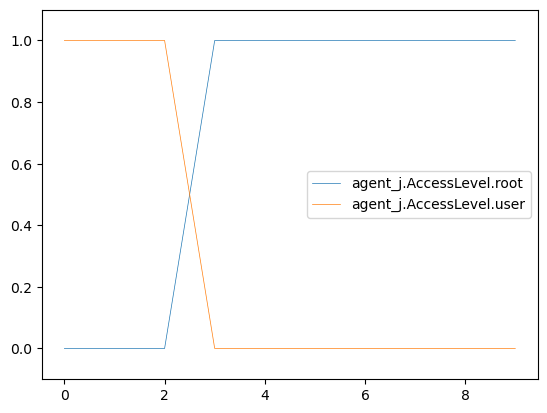

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop  ManipulateData
5                 1.0                  0.0               Nop       FileRecon
6                 0.0                  1.0               Nop  ManipulateData
7                 0.0                  1.0               Nop            Exit
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

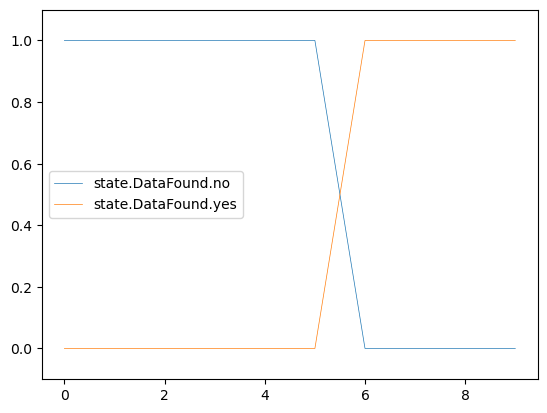

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.027581               0.972419               Nop   
6              0.141867               0.858132               Nop   
7              0.024375               0.975625               Nop   
8              0.001592               0.998408               Nop   
9              0.001586               0.998414               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

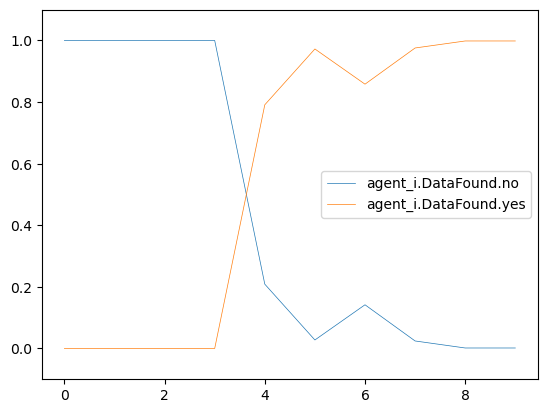

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.108907               0.891093  ManipulateData   
5              0.991876               0.008124       FileRecon   
6              0.325596               0.674404  ManipulateData   
7              0.000483               0.999517            Exit   
8              0.000483               0.999517             Nop   
9              0.000483               0.999517             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

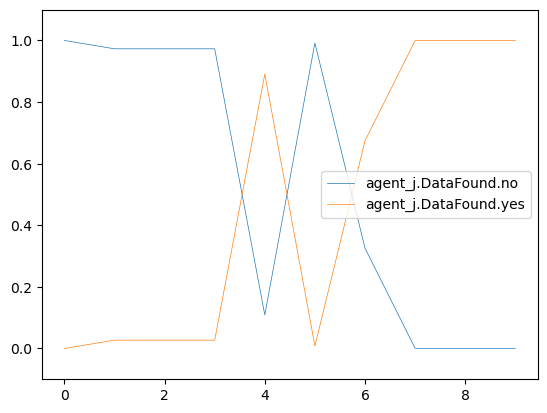

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

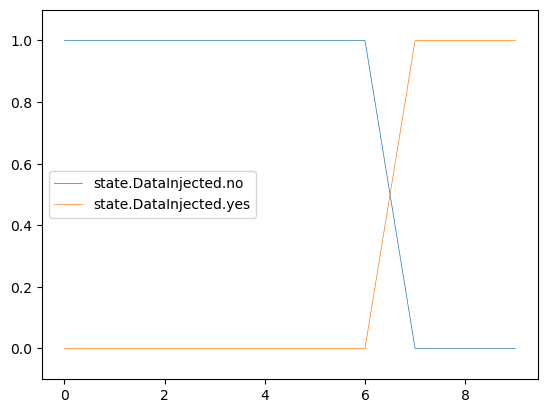

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.030689                  0.969311               Nop   
6                 0.716956                  0.283044               Nop   
7                 0.027599                  0.972401               Nop   
8                 0.002701                  0.997299               Nop   
9                 0.002479                  0.997521               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

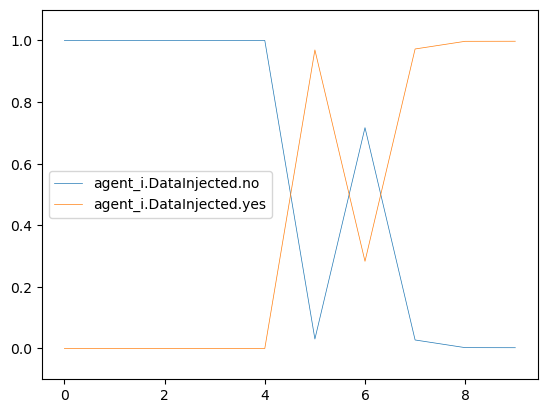

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.991876                  0.008124       FileRecon   
6                 0.970715                  0.029285  ManipulateData   
7                 0.000483                  0.999517            Exit   
8                 0.000483                  0.999517             Nop   
9                 0.000483                  0.999517             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

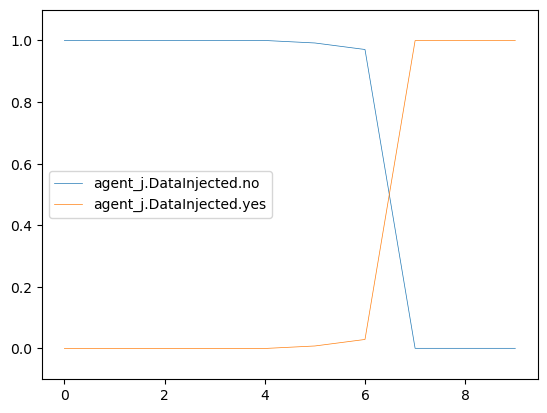

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

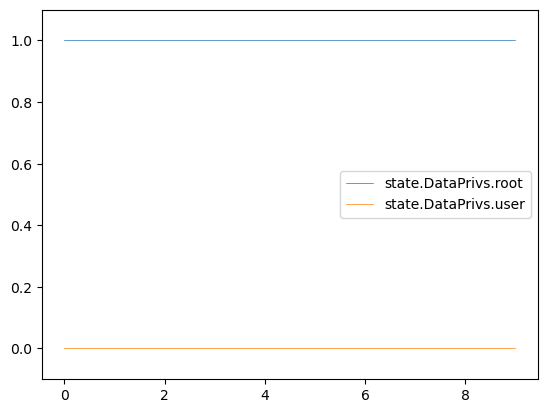

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

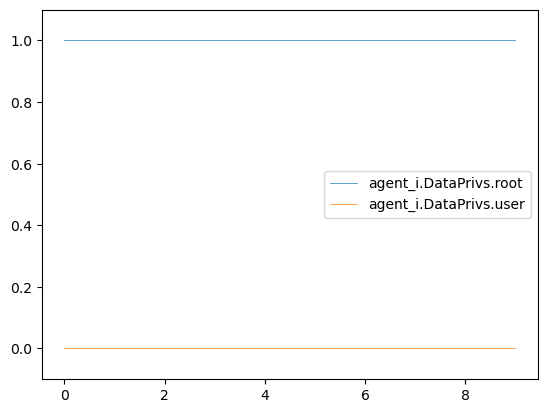

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.661838                0.338162  ManipulateData   
5                0.547491                0.452509       FileRecon   
6                0.641675                0.358325  ManipulateData   
7                0.704509                0.295491            Exit   
8                0.704509                0.295491             Nop   
9                0.704509                0.295491             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

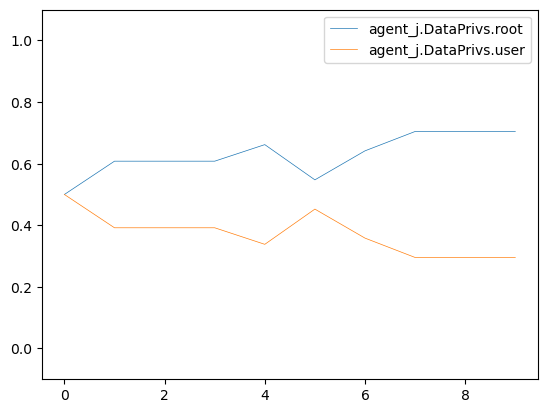

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop       FileRecon
6                0.0                 1.0               Nop  ManipulateData
7                0.0                 1.0               Nop            Exit
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

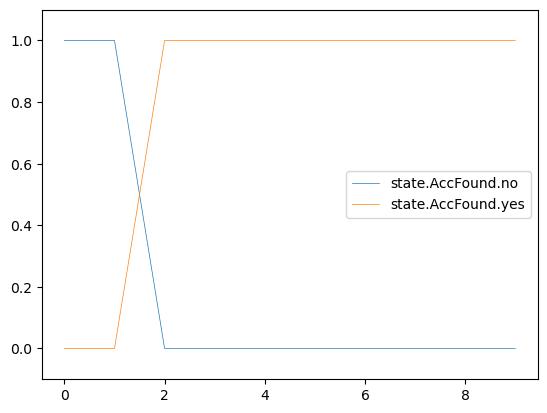

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000      DecoyAccount   
2             0.011249              0.988751  DeployDataDecoys   
3             0.010001              0.989999               Nop   
4             0.000110              0.999890               Nop   
5             0.000003              0.999997               Nop   
6             0.000038              0.999961               Nop   
7             0.000008              0.999992               Nop   
8             0.000002              0.999998               Nop   
9             0.000002              0.999998               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

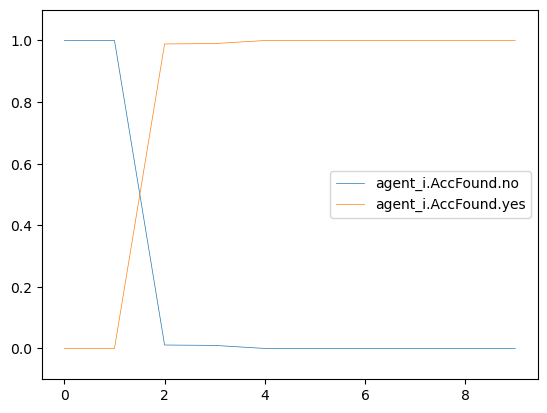

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         5.219558e-07              1.000000  ManipulateData   
5         1.802073e-06              0.999998       FileRecon   
6         9.207281e-07              0.999999  ManipulateData   
7         3.327400e-07              1.000000            Exit   
8         3.327400e-07              1.000000             Nop   
9         3.327400e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

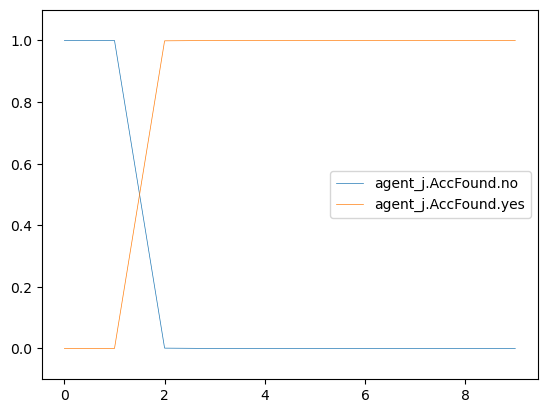

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

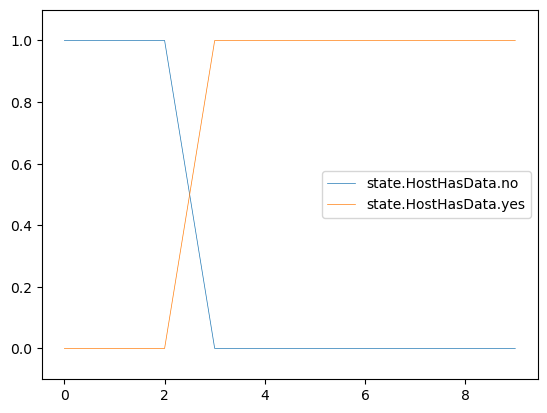

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

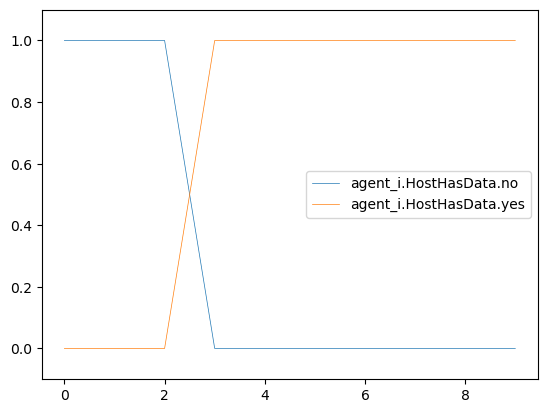

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.412179                 0.587821       FileRecon   
4                0.085560                 0.914440  ManipulateData   
5                0.768172                 0.231828       FileRecon   
6                0.307587                 0.692413  ManipulateData   
7                0.000456                 0.999544            Exit   
8                0.000456                 0.999544             Nop   
9                0.000456                 0.999544             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

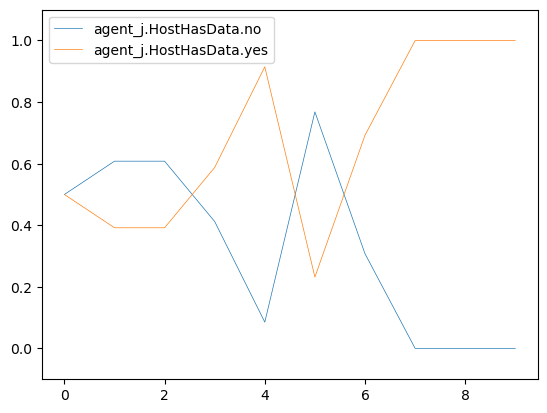

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

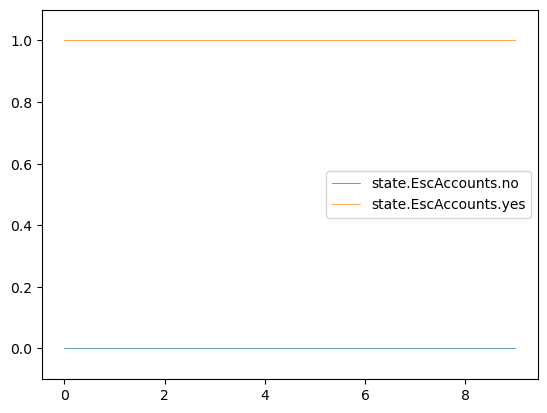

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

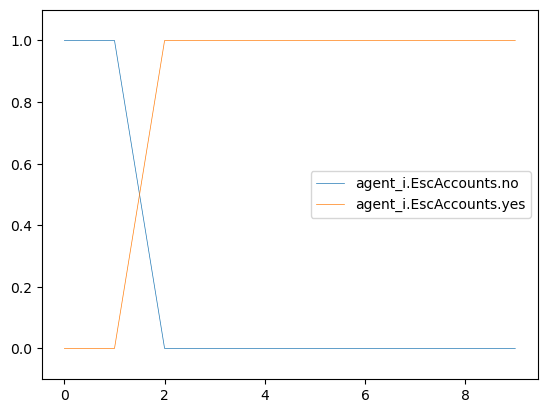

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0       FileRecon   
6                     0.0                      1.0  ManipulateData   
7                     0.0                      1.0            Exit   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

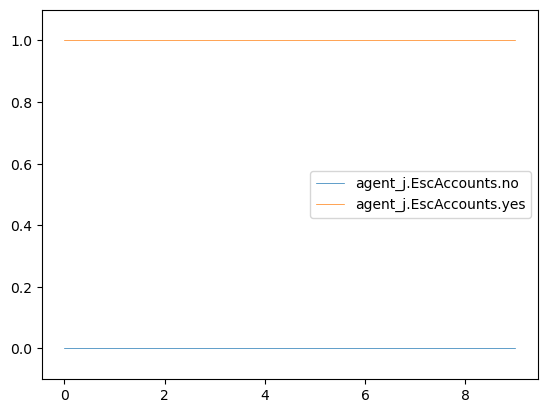

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

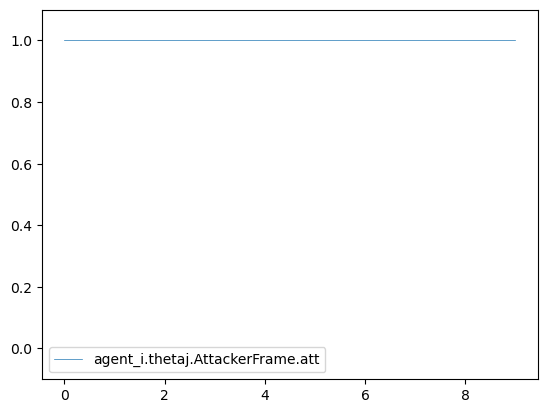

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.171807                        0.828193   
5                         0.430989                        0.569011   
6                         0.561721                        0.438279   
7                         0.561721                        0.438279   
8                         0.561721                        0.438279   
9                         0.561721                        0.438279   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

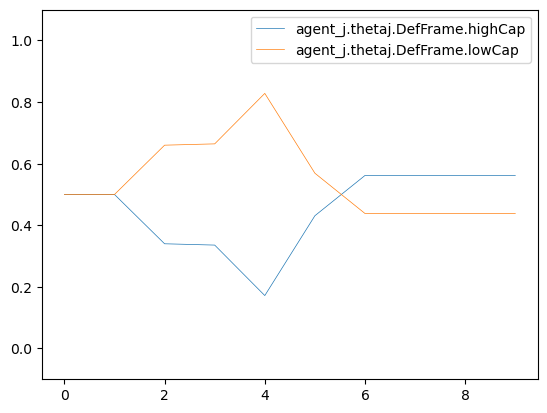

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

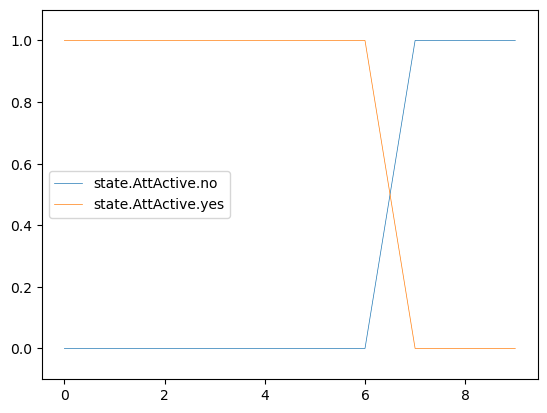

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01      DecoyAccount   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267251e-08           1.000000e+00               Nop   
5          4.933518e-10           1.000000e+00               Nop   
6          7.375657e-03           9.926244e-01               Nop   
7          9.997312e-01           2.687448e-04               Nop   
8          9.999977e-01           2.301814e-06               Nop   
9          1.000000e+00           1.301995e-12               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

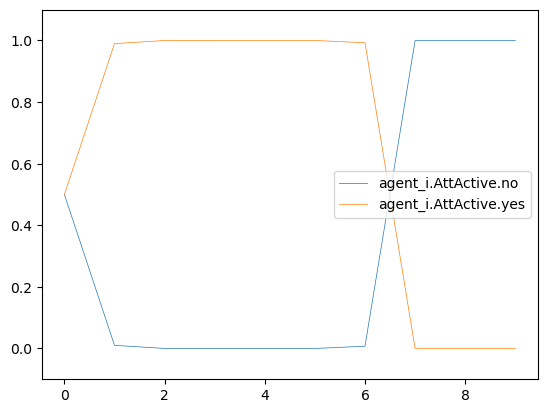

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           failure   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

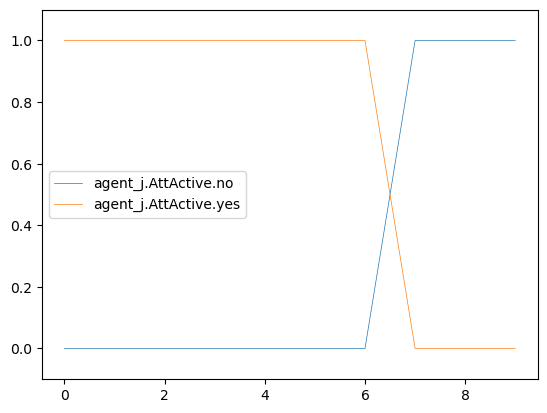

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

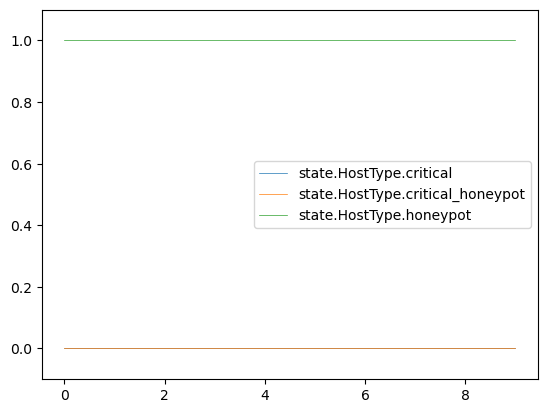

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                       file_write

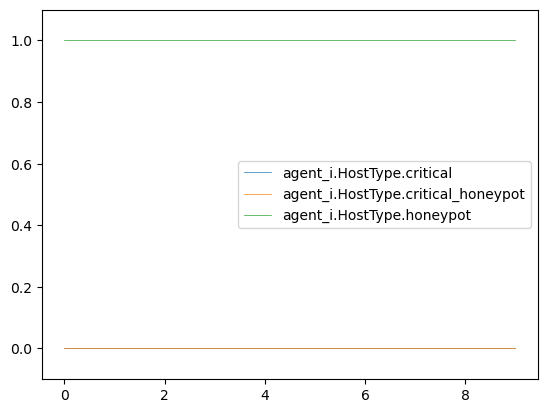

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0    EnumAccounts      DecoyAccount   
2                        0.0      PrivEscAcc  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

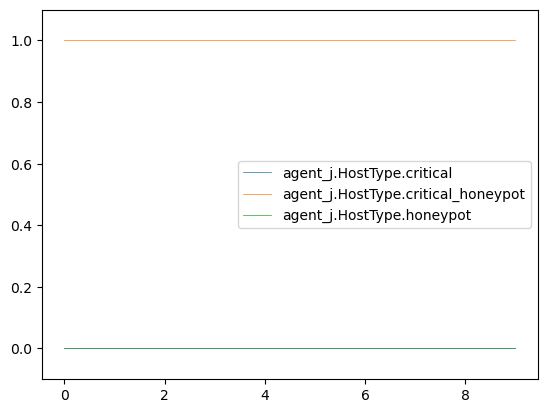

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

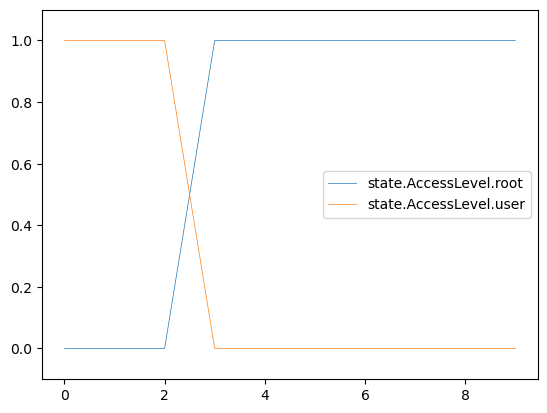

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.989987              1.001289e-02               Nop   
4                  0.990000              1.000001e-02               Nop   
5                  0.999962              3.791984e-05               Nop   
6                  0.999995              4.849562e-06               Nop   
7                  1.000000              4.367168e-07               Nop   
8                  1.000000              4.311194e-07               Nop   
9                  1.000000              4.311194e-07               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

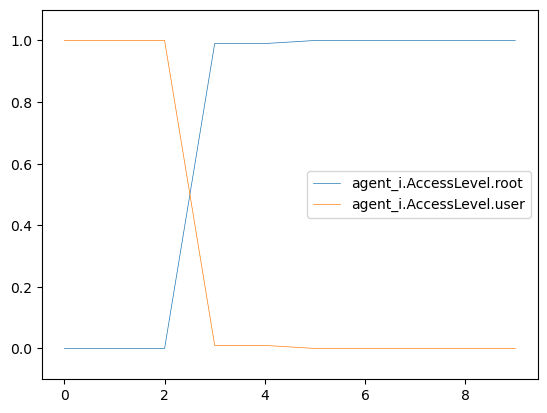

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              9.999999e-01      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  0.999998              1.680827e-06       FileRecon   
5                  0.999999              7.868039e-07  ManipulateData   
6                  1.000000              3.359158e-07            Exit   
7                  1.000000              3.359158e-07             Nop   
8                  1.000000              3.359158e-07             Nop   
9                  1.000000              3.359158e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           failure   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

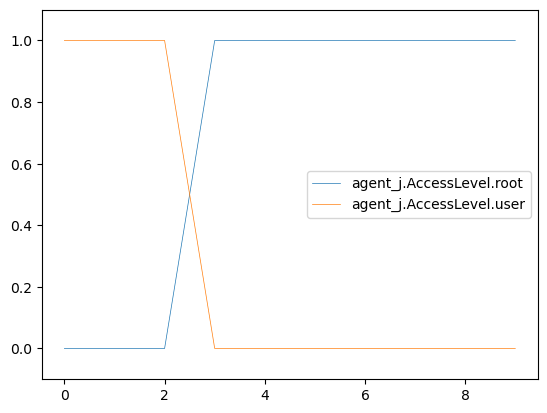

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

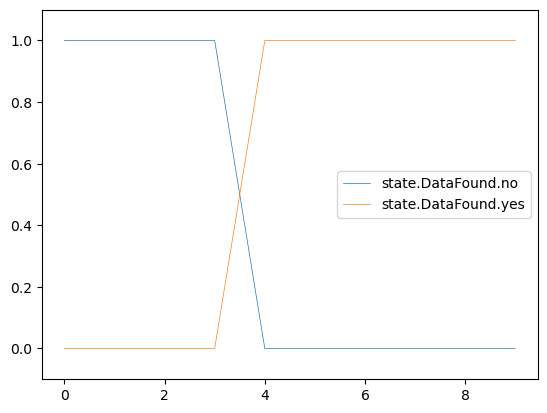

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.135684               0.864316               Nop   
6              0.017697               0.982303               Nop   
7              0.000360               0.999640               Nop   
8              0.000356               0.999644               Nop   
9              0.000356               0.999644               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

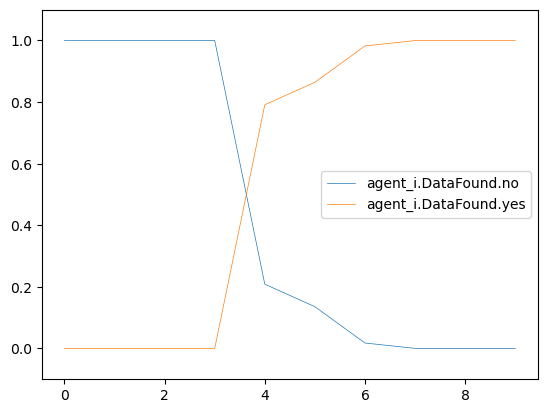

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.908254               0.091746       FileRecon   
5              0.252495               0.747505  ManipulateData   
6              0.000338               0.999662            Exit   
7              0.000338               0.999662             Nop   
8              0.000338               0.999662             Nop   
9              0.000338               0.999662             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           failure   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

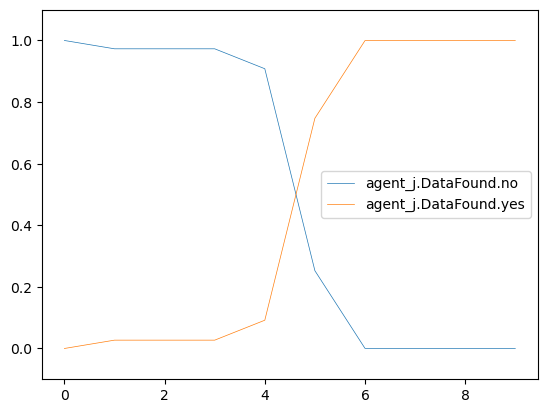

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

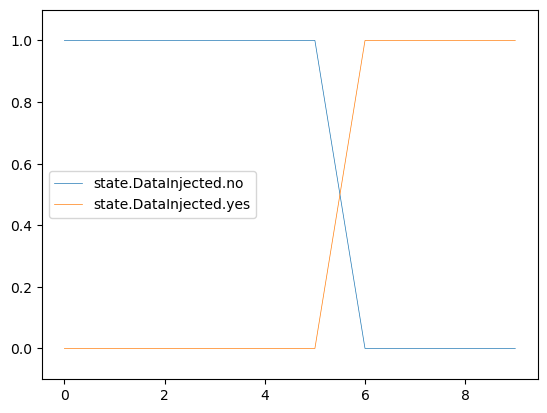

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.972278                  0.027722               Nop   
6                 0.020113                  0.979888               Nop   
7                 0.000787                  0.999213               Nop   
8                 0.000619                  0.999381               Nop   
9                 0.000619                  0.999381               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

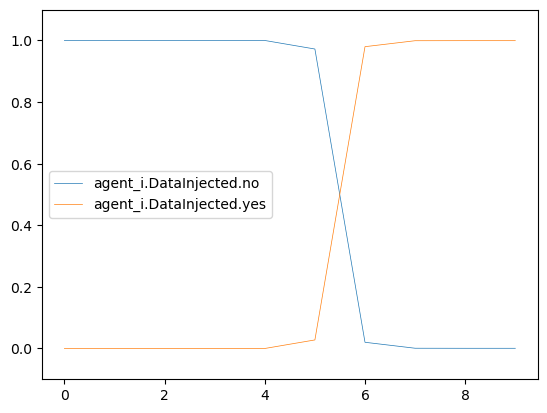

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000338                  0.999662            Exit   
7                 0.000338                  0.999662             Nop   
8                 0.000338                  0.999662             Nop   
9                 0.000338                  0.999662             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           failure   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

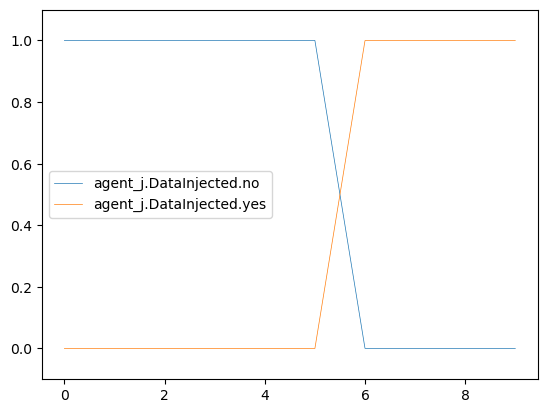

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

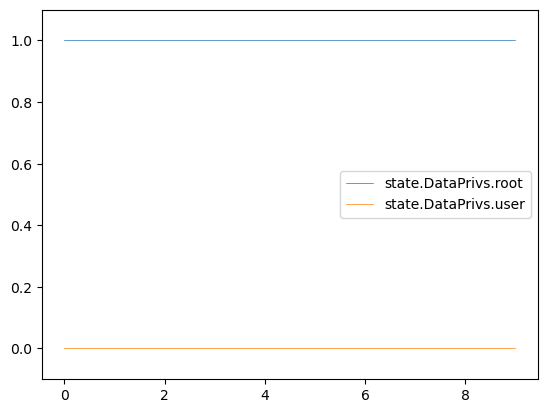

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

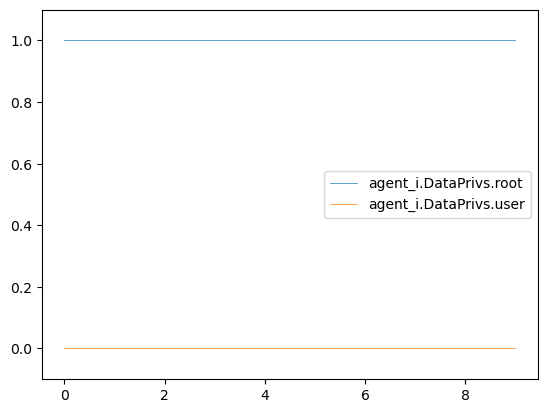

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.558320                0.441680       FileRecon   
5                0.653480                0.346520  ManipulateData   
6                0.701472                0.298528            Exit   
7                0.701472                0.298528             Nop   
8                0.701472                0.298528             Nop   
9                0.701472                0.298528             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           failure   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

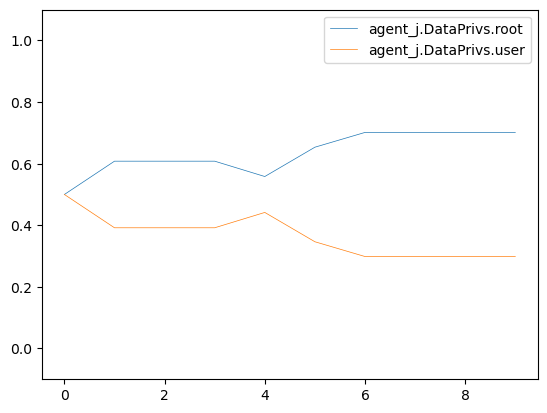

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

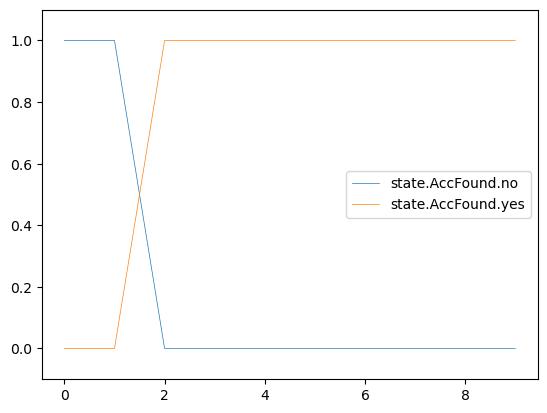

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         1.124935e-02              0.988751  DeployDataDecoys   
3         1.000122e-02              0.989999               Nop   
4         1.099138e-04              0.999890               Nop   
5         3.791530e-05              0.999962               Nop   
6         4.798344e-06              0.999995               Nop   
7         4.367168e-07              1.000000               Nop   
8         4.311194e-07              1.000000               Nop   
9         4.311194e-07              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

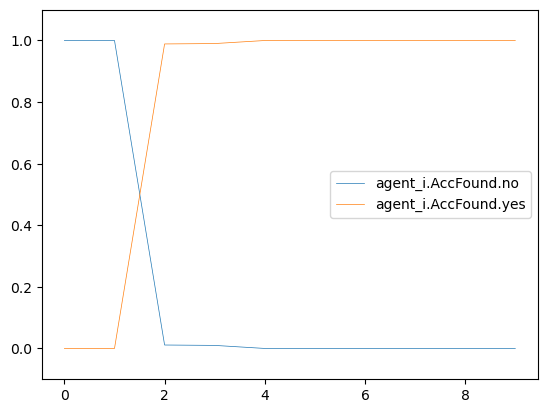

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         1.680827e-06              0.999998       FileRecon   
5         7.868039e-07              0.999999  ManipulateData   
6         3.359158e-07              1.000000            Exit   
7         3.359158e-07              1.000000             Nop   
8         3.359158e-07              1.000000             Nop   
9         3.359158e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           failure   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

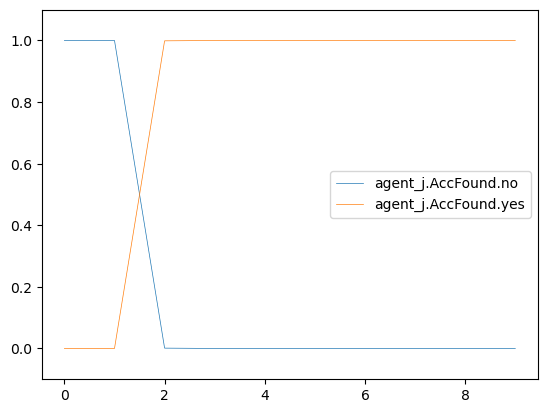

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

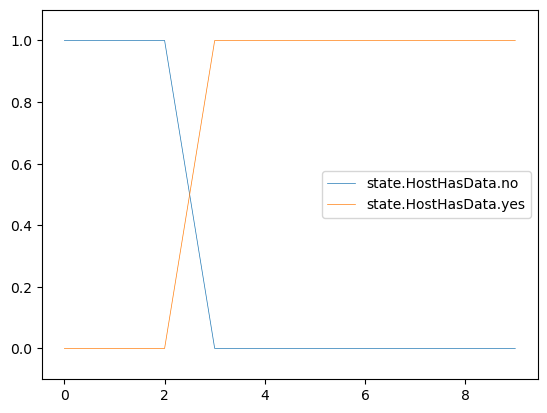

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

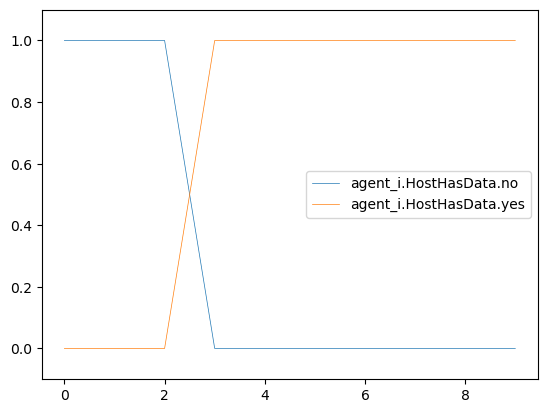

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.412179                 0.587821       FileRecon   
4                0.713540                 0.286460       FileRecon   
5                0.236029                 0.763971  ManipulateData   
6                0.000316                 0.999684            Exit   
7                0.000316                 0.999684             Nop   
8                0.000316                 0.999684             Nop   
9                0.000316                 0.999684             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           failure   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

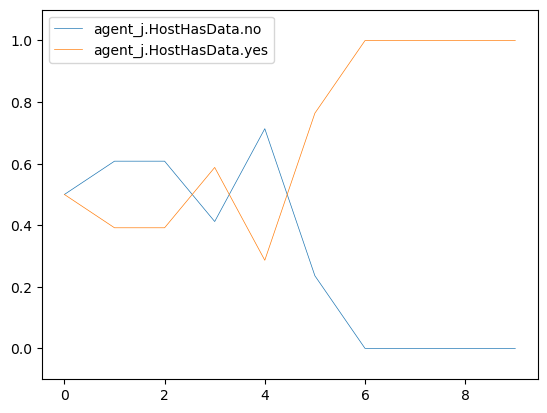

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

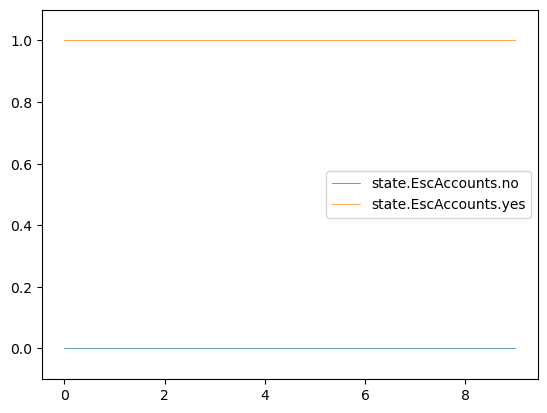

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

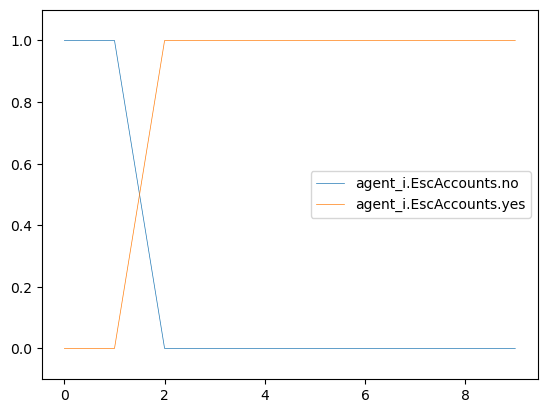

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0       FileRecon   
5                     0.0                      1.0  ManipulateData   
6                     0.0                      1.0            Exit   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           failure   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

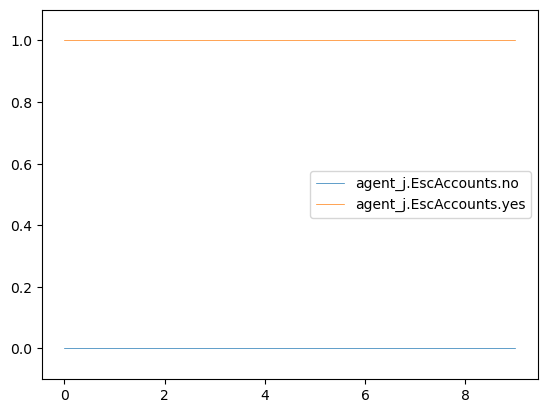

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

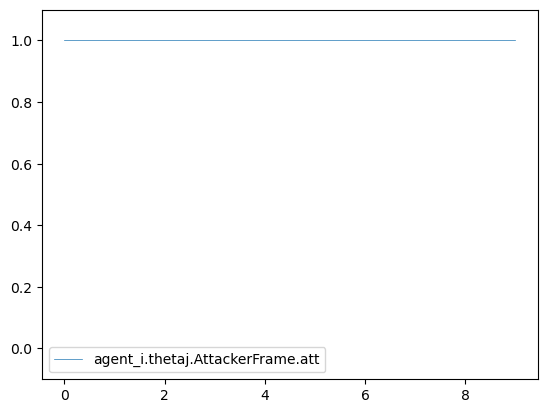

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.507792                        0.492208   
5                         0.553507                        0.446493   
6                         0.553507                        0.446493   
7                         0.553507                        0.446493   
8                         0.553507                        0.446493   
9                         0.553507                        0.446493   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

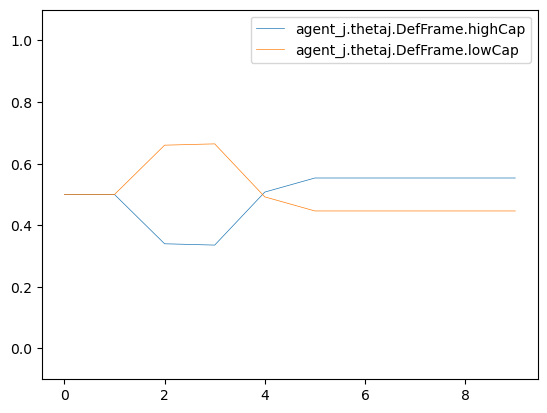

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

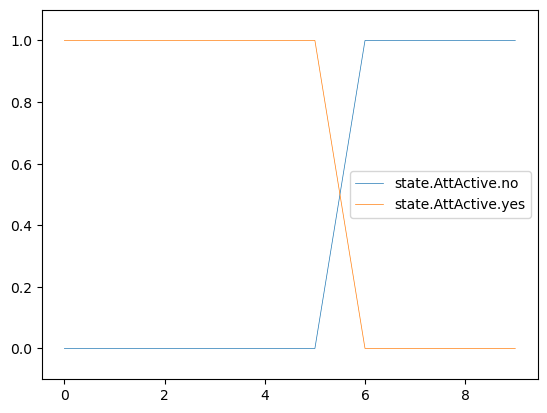

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01      DecoyAccount   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267251e-08           1.000000e+00               Nop   
5          3.556729e-09           1.000000e+00               Nop   
6          9.995813e-01           4.186073e-04               Nop   
7          9.999952e-01           4.869204e-06               Nop   
8          1.000000e+00           1.359676e-08               Nop   
9          1.000000e+00           4.497601e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

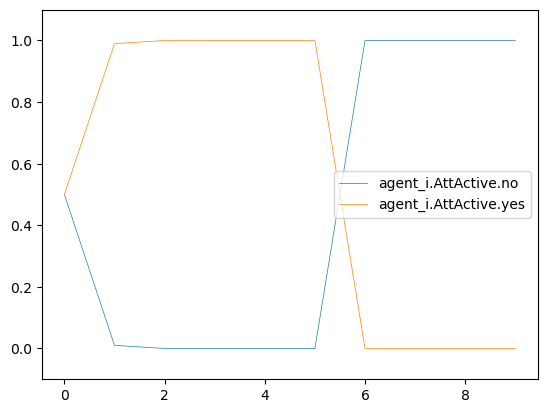

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

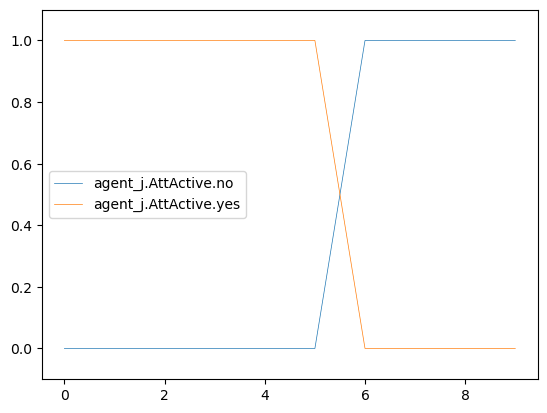

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

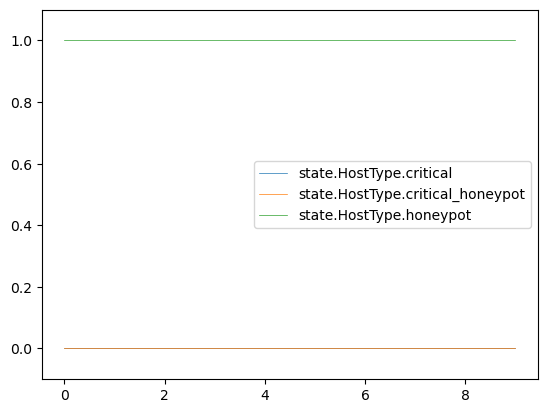

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

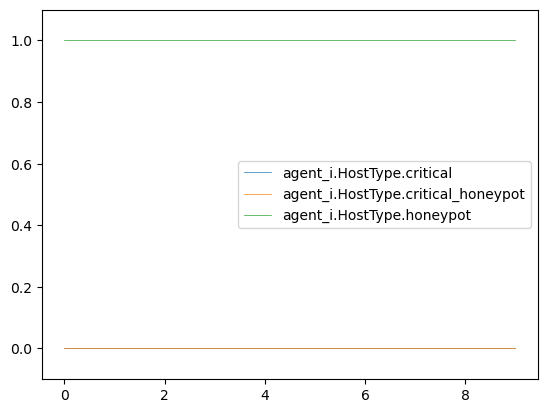

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0    EnumAccounts      DecoyAccount   
2                        0.0      PrivEscAcc  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

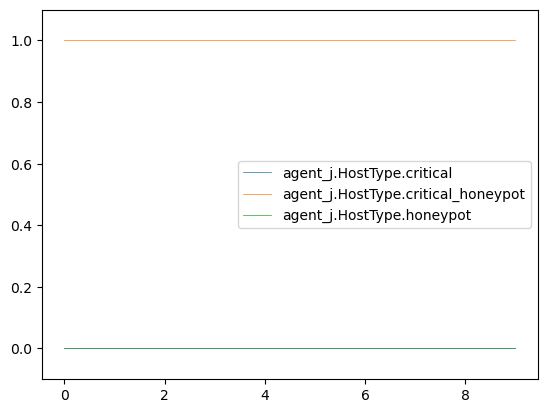

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

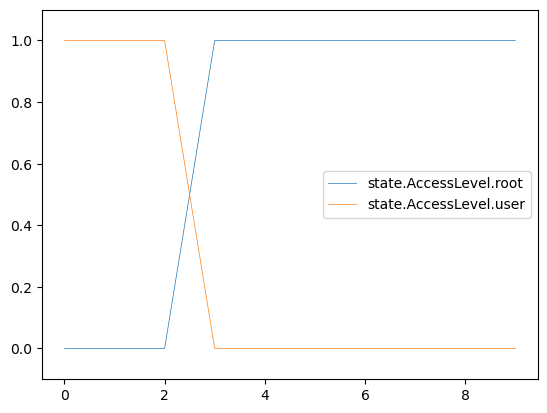

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.989987              1.001289e-02               Nop   
4                  0.990000              1.000001e-02               Nop   
5                  0.999997              2.893018e-06               Nop   
6                  1.000000              4.329665e-08               Nop   
7                  1.000000              6.670387e-09               Nop   
8                  1.000000              6.624332e-09               Nop   
9                  1.000000              6.624416e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

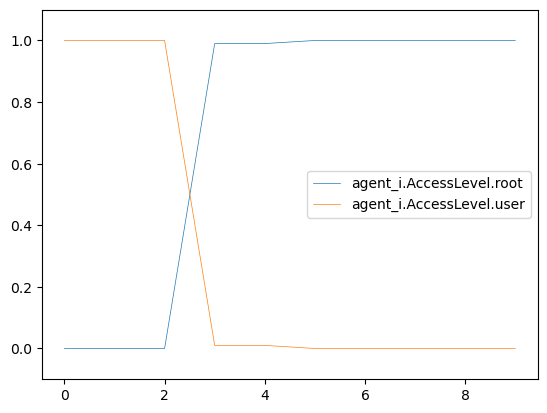

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              9.999999e-01      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  1.000000              5.219558e-07  ManipulateData   
5                  1.000000              3.642446e-07            Exit   
6                  1.000000              3.642445e-07             Nop   
7                  1.000000              3.642446e-07             Nop   
8                  1.000000              3.642445e-07             Nop   
9                  1.000000              3.642445e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

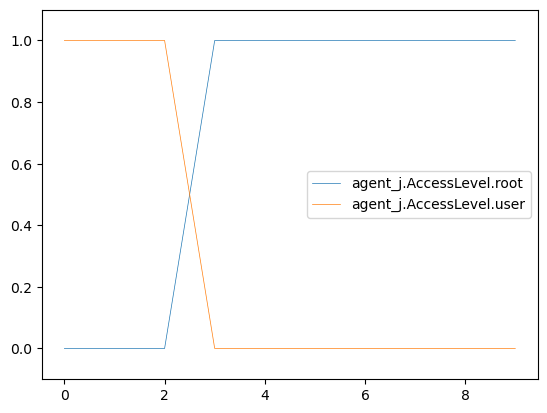

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

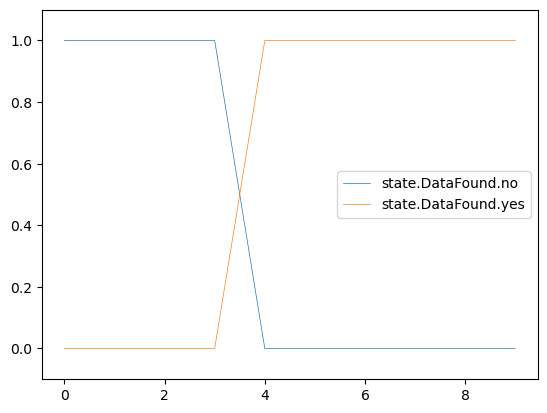

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.027581               0.972419               Nop   
6              0.000101               0.999899               Nop   
7              0.000029               0.999971               Nop   
8              0.000029               0.999971               Nop   
9              0.000029               0.999971               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

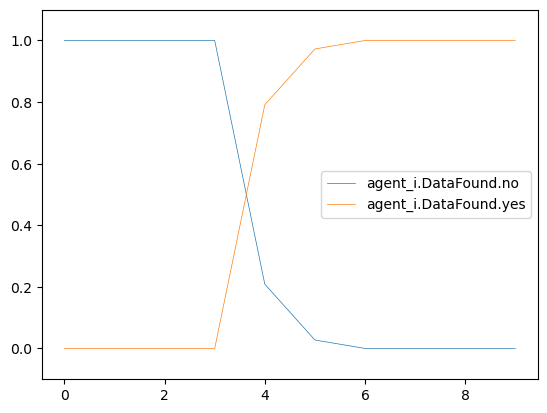

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.108907               0.891093  ManipulateData   
5              0.000122               0.999878            Exit   
6              0.000122               0.999878             Nop   
7              0.000122               0.999878             Nop   
8              0.000122               0.999878             Nop   
9              0.000122               0.999878             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

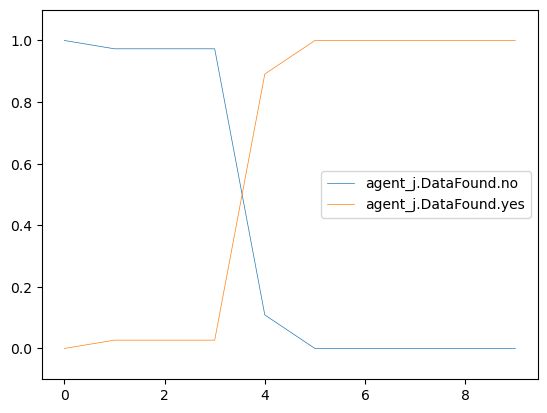

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

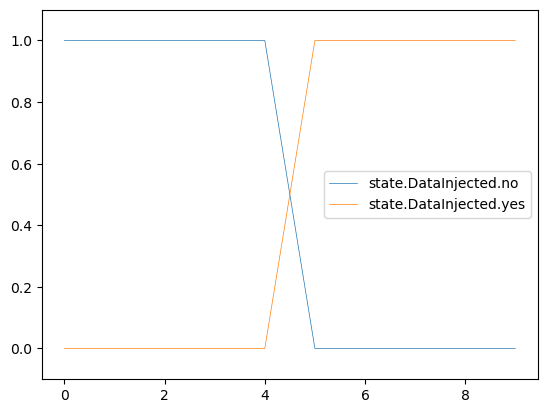

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.030689                  0.969311               Nop   
6                 0.000397                  0.999603               Nop   
7                 0.000031                  0.999969               Nop   
8                 0.000030                  0.999970               Nop   
9                 0.000030                  0.999970               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

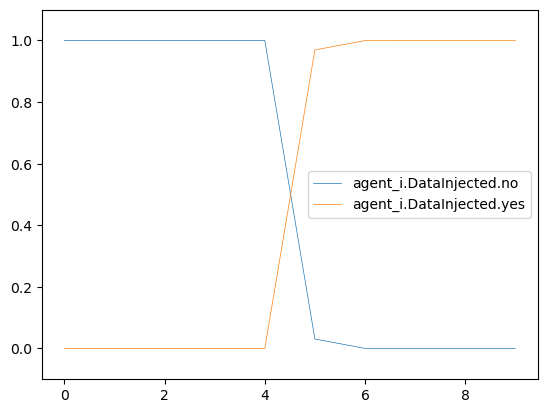

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000122                  0.999878            Exit   
6                 0.000122                  0.999878             Nop   
7                 0.000122                  0.999878             Nop   
8                 0.000122                  0.999878             Nop   
9                 0.000122                  0.999878             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

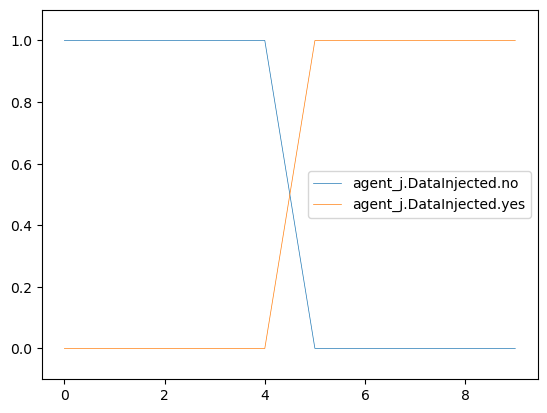

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

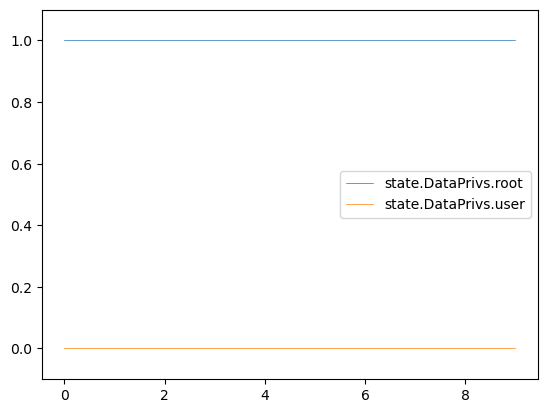

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

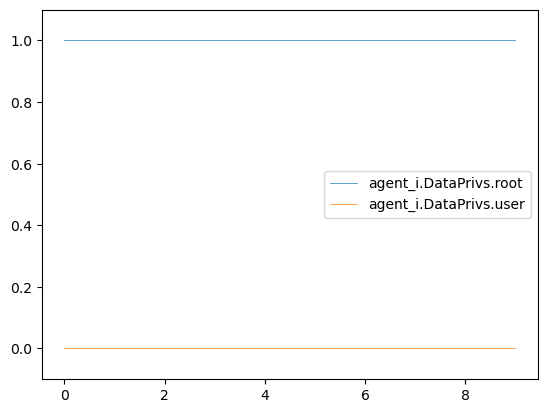

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.661838                0.338162  ManipulateData   
5                0.675924                0.324076            Exit   
6                0.675924                0.324076             Nop   
7                0.675924                0.324076             Nop   
8                0.675924                0.324076             Nop   
9                0.675924                0.324076             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

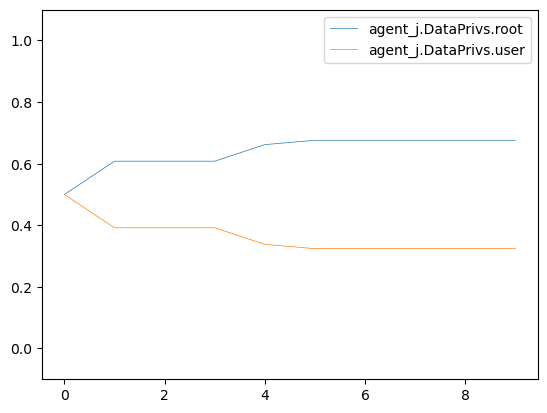

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

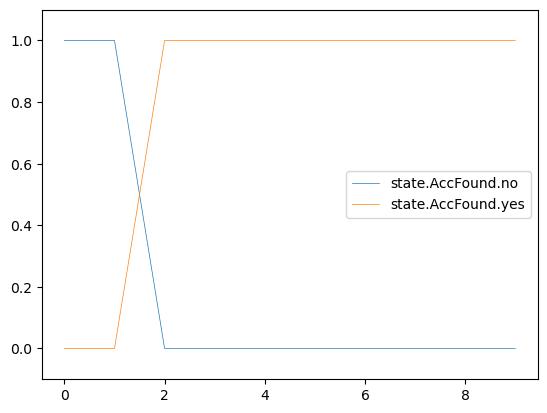

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         1.124935e-02              0.988751  DeployDataDecoys   
3         1.000122e-02              0.989999               Nop   
4         1.099138e-04              0.999890               Nop   
5         2.893001e-06              0.999997               Nop   
6         2.494787e-08              1.000000               Nop   
7         6.670387e-09              1.000000               Nop   
8         6.624302e-09              1.000000               Nop   
9         6.624416e-09              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

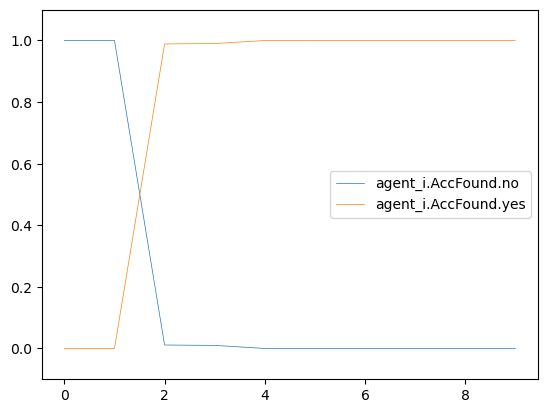

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         5.219558e-07              1.000000  ManipulateData   
5         3.642446e-07              1.000000            Exit   
6         3.642445e-07              1.000000             Nop   
7         3.642446e-07              1.000000             Nop   
8         3.642445e-07              1.000000             Nop   
9         3.642445e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

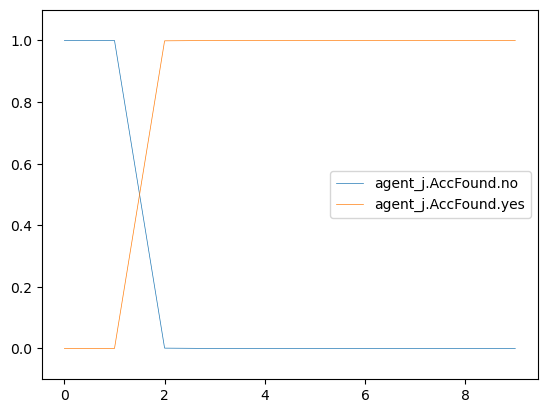

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

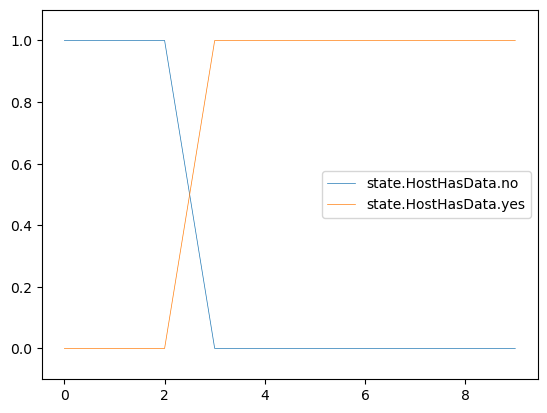

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

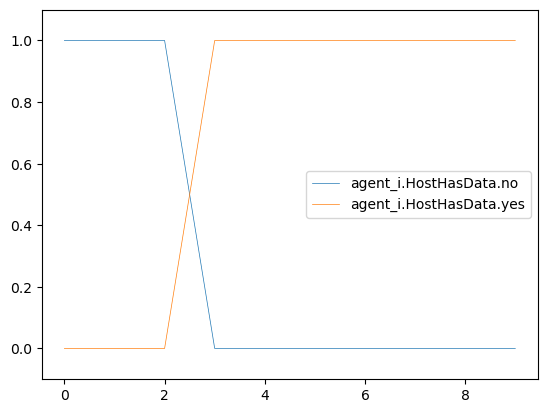

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.412179                 0.587821       FileRecon   
4                0.085560                 0.914440  ManipulateData   
5                0.000095                 0.999905            Exit   
6                0.000095                 0.999905             Nop   
7                0.000095                 0.999905             Nop   
8                0.000095                 0.999905             Nop   
9                0.000095                 0.999905             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

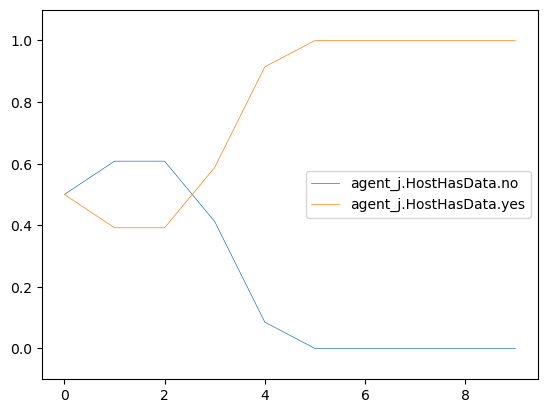

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

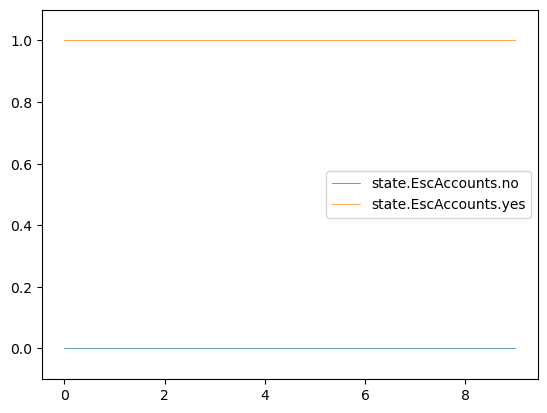

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

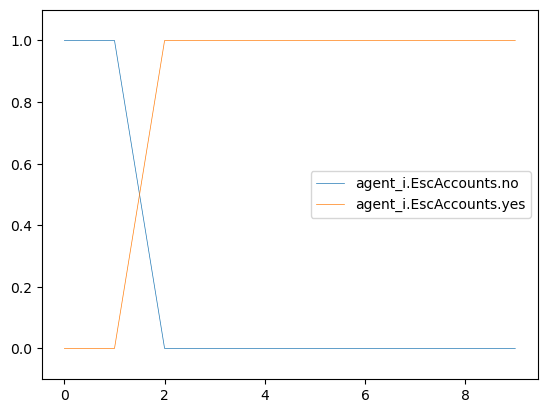

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

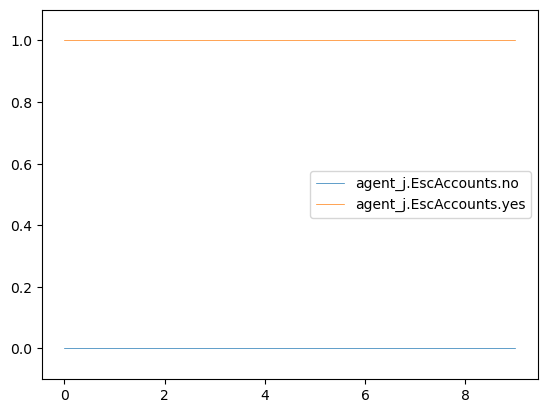

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                       file_write
9                               1.0                             none

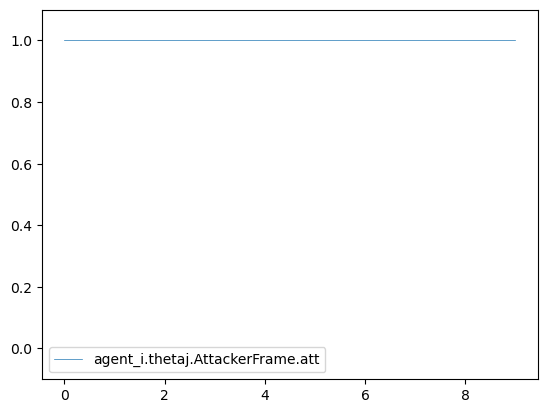

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.507792                        0.492208   
5                         0.553507                        0.446493   
6                         0.553507                        0.446493   
7                         0.553507                        0.446493   
8                         0.553507                        0.446493   
9                         0.553507                        0.446493   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

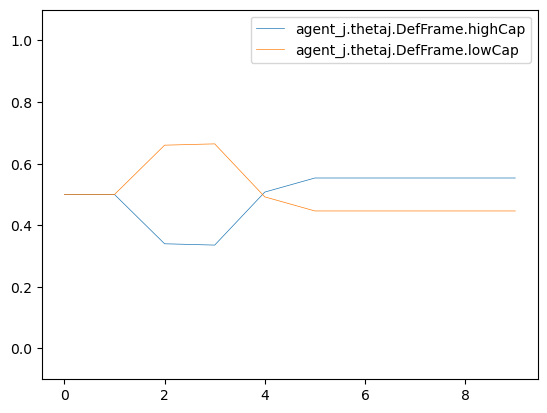

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

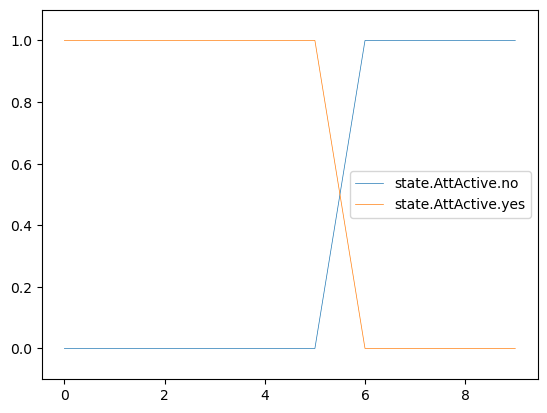

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01      DecoyAccount   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267251e-08           1.000000e+00               Nop   
5          3.556729e-09           1.000000e+00               Nop   
6          9.995813e-01           4.186073e-04               Nop   
7          9.999952e-01           4.869204e-06               Nop   
8          9.999953e-01           4.678545e-06               Nop   
9          1.000000e+00           1.756417e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

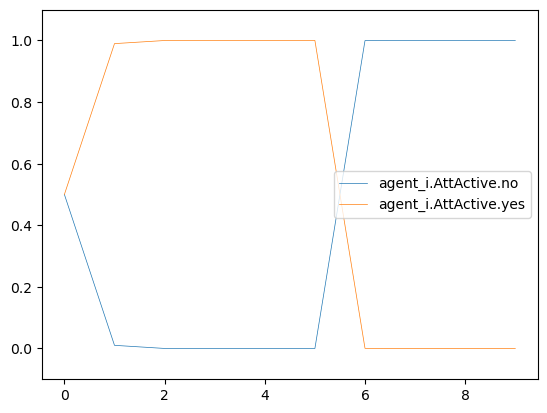

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

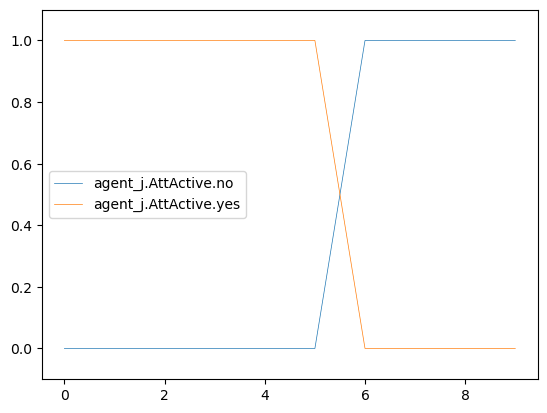

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

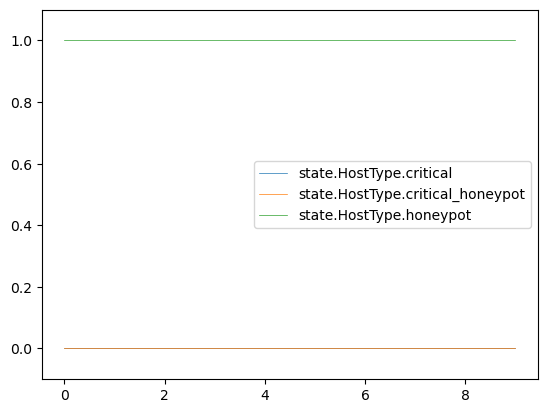

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                       file_write  
8                       file_write  
9                             none

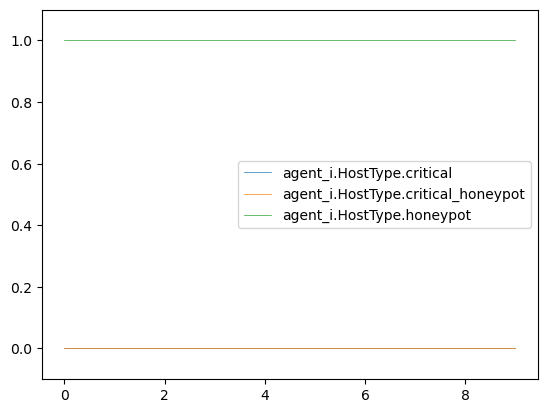

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0    EnumAccounts      DecoyAccount   
2                        0.0      PrivEscAcc  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

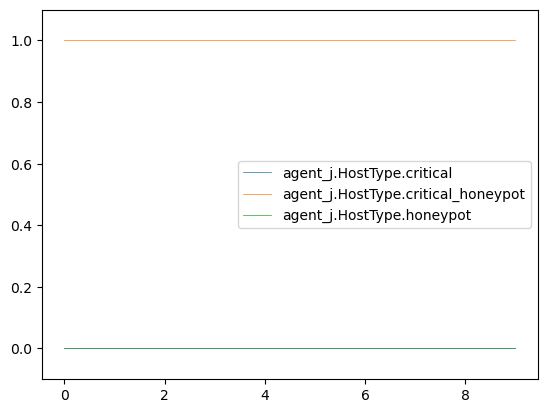

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

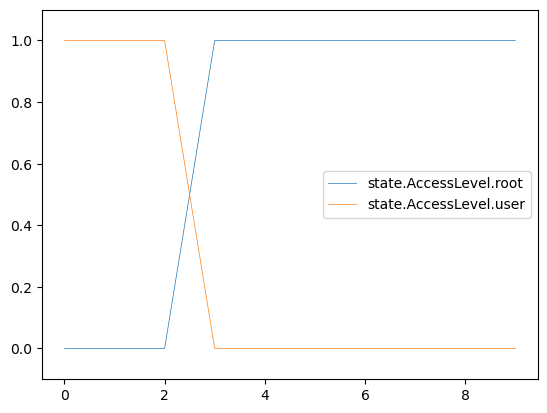

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.989987              1.001289e-02               Nop   
4                  0.990000              1.000001e-02               Nop   
5                  0.999997              2.893018e-06               Nop   
6                  1.000000              4.329665e-08               Nop   
7                  1.000000              6.670387e-09               Nop   
8                  1.000000              6.726874e-09               Nop   
9                  1.000000              6.727104e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

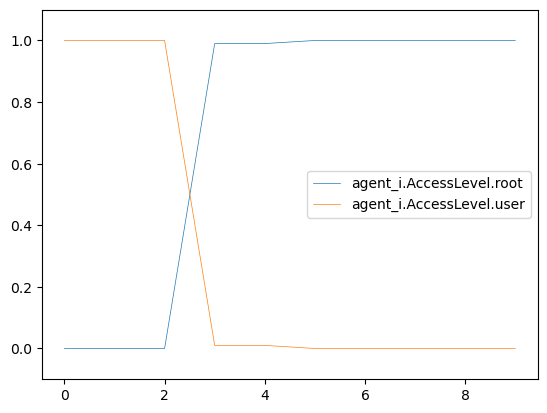

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              9.999999e-01      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  1.000000              5.219558e-07  ManipulateData   
5                  1.000000              3.642446e-07            Exit   
6                  1.000000              3.642445e-07             Nop   
7                  1.000000              3.642446e-07             Nop   
8                  1.000000              3.642445e-07             Nop   
9                  1.000000              3.642445e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

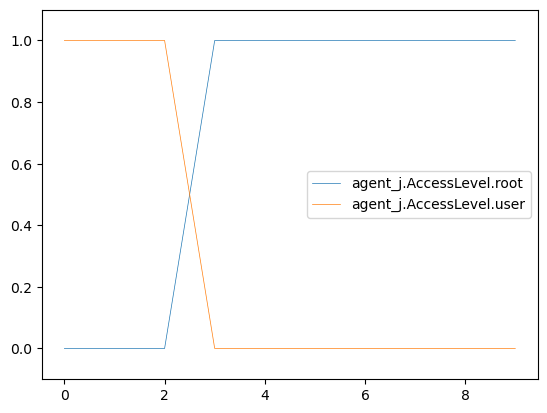

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

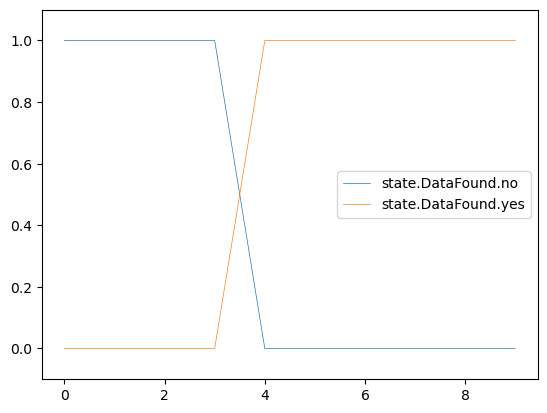

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.027581               0.972419               Nop   
6              0.000101               0.999899               Nop   
7              0.000029               0.999971               Nop   
8              0.000029               0.999971               Nop   
9              0.000029               0.999971               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

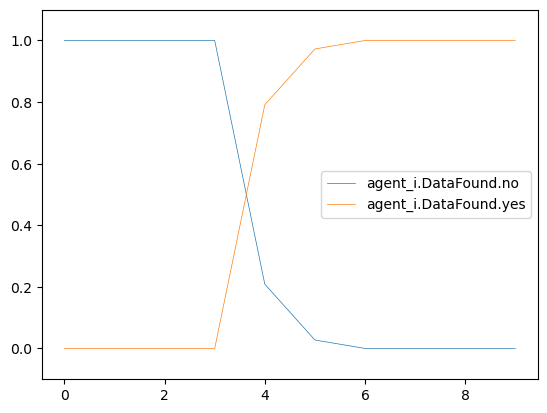

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.108907               0.891093  ManipulateData   
5              0.000122               0.999878            Exit   
6              0.000122               0.999878             Nop   
7              0.000122               0.999878             Nop   
8              0.000122               0.999878             Nop   
9              0.000122               0.999878             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

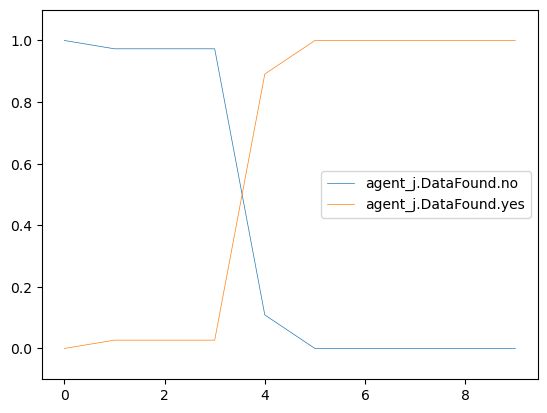

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

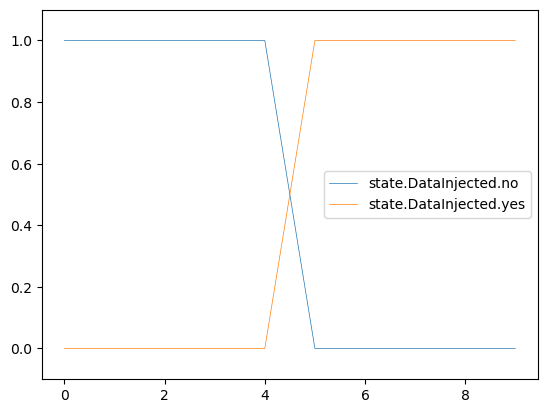

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.030689                  0.969311               Nop   
6                 0.000397                  0.999603               Nop   
7                 0.000031                  0.999969               Nop   
8                 0.000030                  0.999970               Nop   
9                 0.000030                  0.999970               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

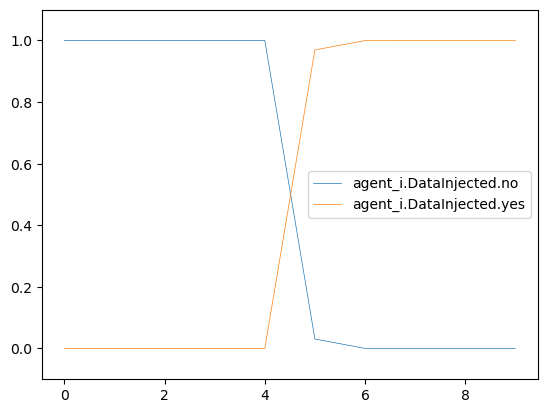

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000122                  0.999878            Exit   
6                 0.000122                  0.999878             Nop   
7                 0.000122                  0.999878             Nop   
8                 0.000122                  0.999878             Nop   
9                 0.000122                  0.999878             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

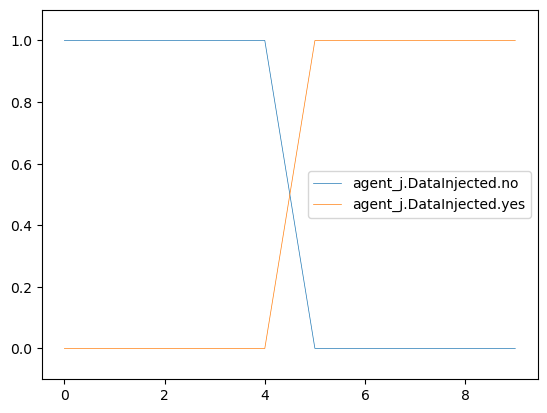

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

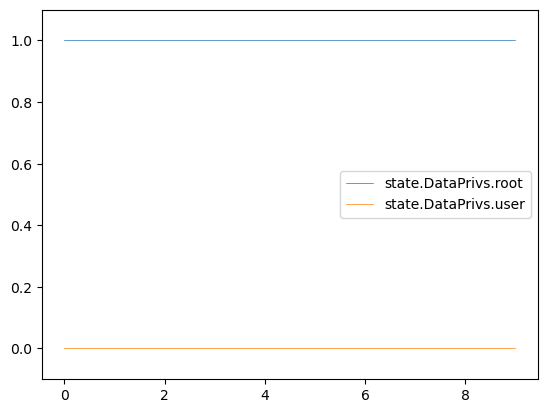

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

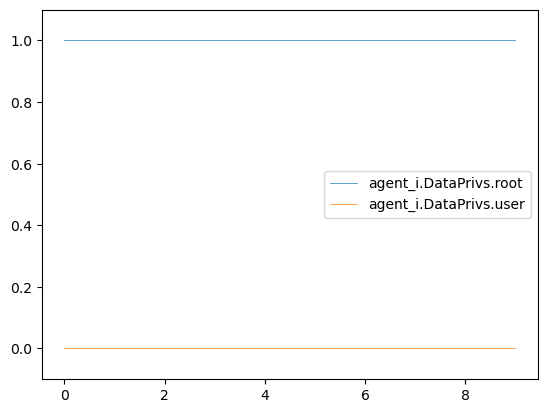

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.661838                0.338162  ManipulateData   
5                0.675924                0.324076            Exit   
6                0.675924                0.324076             Nop   
7                0.675924                0.324076             Nop   
8                0.675924                0.324076             Nop   
9                0.675924                0.324076             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

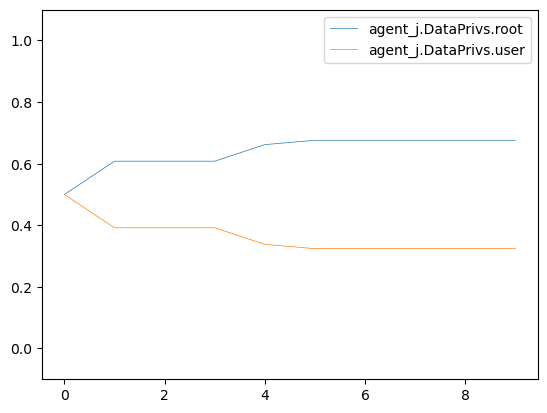

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

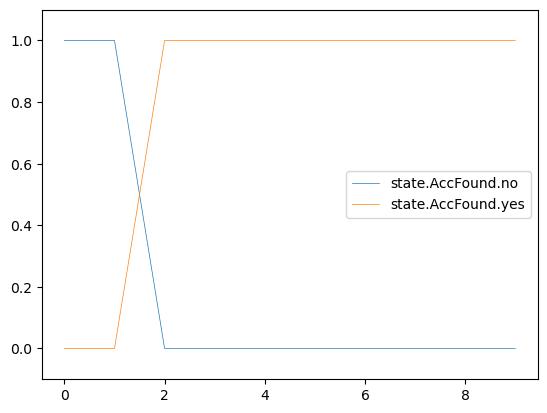

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         1.124935e-02              0.988751  DeployDataDecoys   
3         1.000122e-02              0.989999               Nop   
4         1.099138e-04              0.999890               Nop   
5         2.893001e-06              0.999997               Nop   
6         2.494787e-08              1.000000               Nop   
7         6.670387e-09              1.000000               Nop   
8         6.726756e-09              1.000000               Nop   
9         6.727104e-09              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

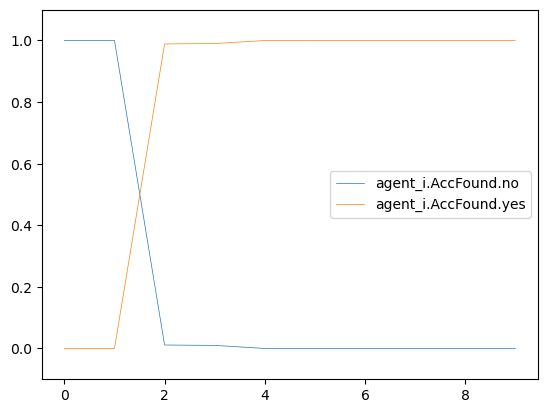

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         5.219558e-07              1.000000  ManipulateData   
5         3.642446e-07              1.000000            Exit   
6         3.642445e-07              1.000000             Nop   
7         3.642446e-07              1.000000             Nop   
8         3.642445e-07              1.000000             Nop   
9         3.642445e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

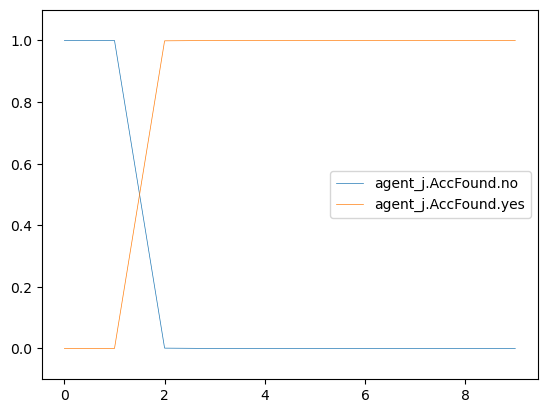

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

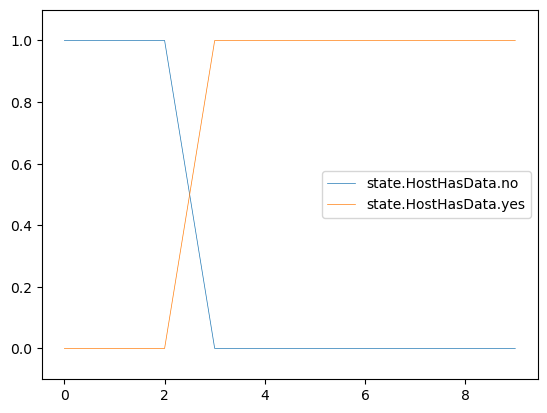

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

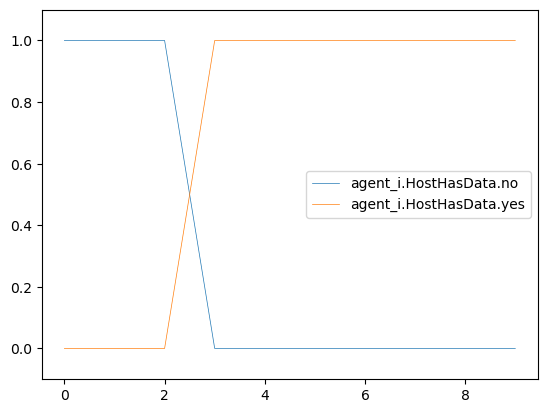

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.412179                 0.587821       FileRecon   
4                0.085560                 0.914440  ManipulateData   
5                0.000095                 0.999905            Exit   
6                0.000095                 0.999905             Nop   
7                0.000095                 0.999905             Nop   
8                0.000095                 0.999905             Nop   
9                0.000095                 0.999905             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

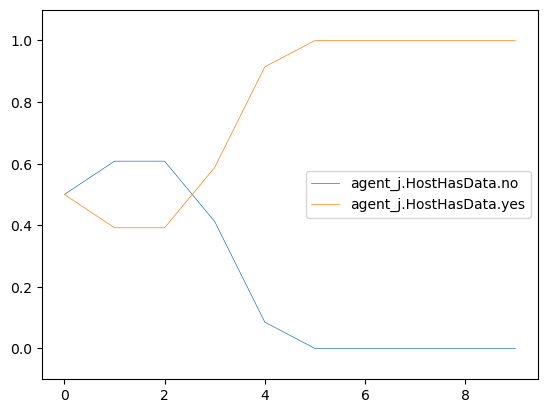

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

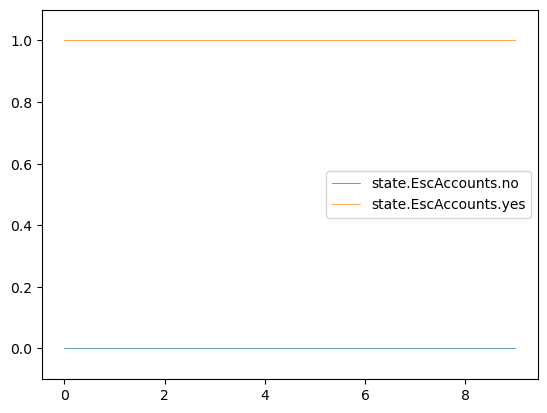

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

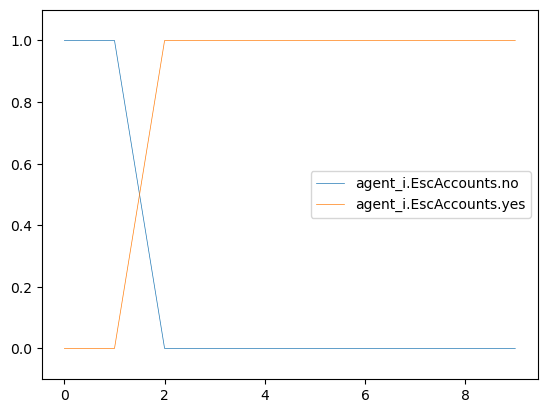

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0               Nop                           failure   
1      DecoyAccount                           success   
2  DeployDataDecoys                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           failure   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

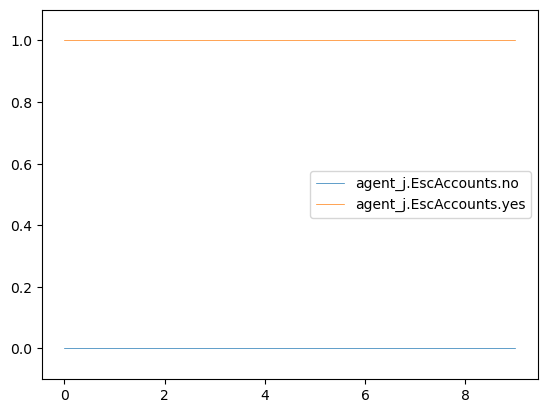

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    